# MC030 - Projeto final de Graduação
## Análise e Previsão do Mercado de Ações

## Descrição do modelo

A partir de um conjunto de cotações diárias de dólar para real (USD-BRL) desejamos modelar esse comportamento a partir de uma série de indicadores de mercado financeiro para classificarmos cada dia como um momento de compra ou momento de venda.

# ...

# Código

### Definindo endpoints da API (https://www.alphavantage.co/documentation/)

In [1]:
apiToken = '3GX5M109KQK9B6HO'
baseUrl = 'https://www.alphavantage.co/query?&outputsize=full&apikey=' + apiToken
usdBrlUrl = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&outputsize=full&apikey=' + apiToken
stockUrl = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=demo'

### Obtendo dados da API

In [2]:
import requests
import json
import time
callsMade = 0
def incrementAndVerifyCallsMade():
    global callsMade
    if callsMade == 4:
        print('Made 5 requests to the API in the last minute - sleeping for 1 minute')
        time.sleep(65)
        callsMade = 0
    callsMade += 1
def parsePriceRetrieved(stocksRetrieved):
    stockPrices = {}
    for date, candle in stocksRetrieved.items():
        stockPrices[date] = candle['5. adjusted close']
    return stockPrices
def parseIndicatorRetrieved(indicatorsRetrieved):
    indicatorValues = {}
    for date, indicator in indicatorsRetrieved.items():
        for indicatorSymbol, indicatorValue in indicator.items():
            if indicatorSymbol == 'Chaikin A/D':
                indicatorSymbol = 'AD'
            elif indicatorSymbol == 'MACD_Signal' or indicatorSymbol == 'MACD_Hist':
                continue
            indicatorValues[date] = {indicatorSymbol: indicatorValue}
    return indicatorValues
# returns [{date: price}]
def getStockPrice(stockSymbol):
    stockUrl = baseUrl + '&function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + stockSymbol
    print('Fetching ' + stockUrl)
    incrementAndVerifyCallsMade()
    stocksRetrieved = requests.get(stockUrl).json();
    stocks = parsePriceRetrieved(stocksRetrieved['Time Series (Daily)'])
    print('Retrieved and parsed '+ stockUrl)
    return stocks
# returns [{date: price}]
def getForexPrice(fromSymbol, toSymbol):
    forexUrl = baseUrl + '&function=FX_DAILY&from_symbol=' + fromSymbol + '&to_symbol=' + toSymbol
    print('Fetching ' + forexUrl)
    incrementAndVerifyCallsMade()
    forexRetrieved = requests.get(forexUrl).json();
    forex = parsePriceRetrieved(forexRetrieved)
    print('Retrieved and parsed '+ forexUrl)
    return forex
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicator(indicatorFunction, symbol):
    indicatorUrl = baseUrl + '&interval=daily&series_type=open&function=' + indicatorFunction + '&symbol=' + symbol
    if indicatorFunction=='SMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='EMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='WMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='DEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='KAMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MAMA':
        indicatorUrl += '&fastlimit=0.01&slowlimit=0.01'
    elif indicatorFunction=='T3':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MACD':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9'
    elif indicatorFunction=='MACDEXT':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9&fastmatype=0&slowmatype=0&signalmatype=0'
    elif indicatorFunction=='STOCH':
        indicatorUrl += '&fastkperiod=5&slowkperiod=3&slowdperiod=3&slowkmatype=0&slowdmatype=0'
    elif indicatorFunction=='STOCHF':
        indicatorUrl += '&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='RSI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='STOCHRSI':
        indicatorUrl += '&time_period=10&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='WILLR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADXR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='APO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='PPO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='MOM':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='BOP':
        indicatorUrl += ''
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CMO':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROCR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AROON':
        indicatorUrl += '&time_period=14'
    elif indicatorFunction=='AROONOSC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MFI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ULTOSC':
        indicatorUrl += '&timeperiod1=7&timeperiod2=14&timeperiod3=28'
    elif indicatorFunction=='DX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AD':
        indicatorUrl += ''
        indicatorFunction = 'Chaikin A/D'
    elif indicatorFunction=='OBV':
        indicatorUrl += ''
    # TODO: terminar isso aqi
    print('Fetching ' + indicatorUrl)
    incrementAndVerifyCallsMade();
    indicatorRetrieved = requests.get(indicatorUrl).json()
    indicators = parseIndicatorRetrieved(indicatorRetrieved['Technical Analysis: ' + indicatorFunction])
    print('Retrieved and parsed '+ indicatorUrl)
    return indicators
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicatorList(indicatorFunctions, symbol):
    indicators = {}
    for indicatorFunction in indicatorFunctions:
        indicatorDict = getIndicator(indicatorFunction, symbol)
        for date, indicator in indicatorDict.items():
            for indicatorFunction, indicatorValue in indicator.items():
                if  date not in indicators:
                    indicators[date] = {}
                indicators[date][indicatorFunction] = indicatorValue
    return indicators

In [3]:
# Filtrando dados válidos - apenas aqueles cujas datas estão na lista de preços e de indicadores
def filterData(prices, indicators, indicatorFunctions):
    filteredPrices = {date: price for date, price in prices.items() if date in indicators.keys()}
    filteredIndicators = {date: indicators for date, indicators in indicators.items() if date in prices.keys()}
    return filteredPrices, filteredIndicators

def getData(stockSymbol, indicatorFunctions):
    stockPrices = getStockPrice(stockSymbol)
    indicators = getIndicatorList(indicatorFunctions, stockSymbol)
    stockPrices, indicators = filterData(stockPrices, indicators, indicatorFunctions)
    return stockPrices, indicators

def getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions):
    forexPrices = getForexPrice(fromForexSymbol, toForexSymbol)
    indicators = getIndicatorList(indicatorFunctions, fromForexSymbol + toForexSymbol)
    forexPrices, indicators = filterData(forexPrices, indicators)
    return forexPrices, indicators

### Métodos de anotação de dados

In [4]:
import collections

def annotateBuyOrSellTwoClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'B'
            last = 'B'
        elif float(price) < yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'S'
            last = 'S'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateBuyOrSellEightClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.005:
            dateAnnotated[yesterdayDate] = 'B0'
            last = 'B0'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.01:
            dateAnnotated[yesterdayDate] = 'B1'
            last = 'B1'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.02:
            dateAnnotated[yesterdayDate] = 'B2'
            last = 'B2'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice > 1.02:
            dateAnnotated[yesterdayDate] = 'B3'
            last = 'B3'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .995:
            dateAnnotated[yesterdayDate] = 'S0'
            last = 'S0'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .99:
            dateAnnotated[yesterdayDate] = 'S1'
            last = 'S1'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .98:
            dateAnnotated[yesterdayDate] = 'S2'
            last = 'S2'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice < .98:
            dateAnnotated[yesterdayDate] = 'S3'
            last = 'S3'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateMaxProfit(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    yesterdayPrice = 0
    currentStatus = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = value
        break
    for date, price in prices.items():
        if price > yesterdayPrice and currentStatus != 'B':
            dateAnnotated[yesterdayDate] = 'B'
            currentStatus = 'B'
        elif price < yesterdayPrice and currentStatus != 'S':
            dateAnnotated[yesterdayDate] = 'S'
            currentStatus = 'S'
        yesterdayDate = date
        yesterdayPrice = price
    return dateAnnotated

### Normalização dos dados

In [5]:
# Dúvida - como faremos a normalização?
# Ideia: normalizarmos de acordo com o preço da ação no momento

# Exemplo: temos o valor de uma ação atualmente em R$3.00, mas sua média dos últimos 10 dias é de R$2.90,
# logo esta ação está aumentando de valor. Se normalizarmos todos os indicadores de acordo com o preço atual
# da ação podemos ter mais sucesso, pois no momento de atuação do modelo tudo que ele terá acesso será o preço 
# atual da ação e seus indicadores... Normalizar de acordo com um teto e piso de valores acho que pode dar ruim.

import copy

# Normaliza um conjunto de indicadores a partir do preço da ação
def normalizeIndicators(indicatorSet, stockPrice):
    normalizedIndicatorSet = {}
    for indicatorFunction, indicatorValue in indicatorSet.items():
        normalizedIndicatorSet[indicatorFunction] = float(indicatorValue)/float(stockPrice)
    return normalizedIndicatorSet

# Retorna os indicadores normalizados: indicadores = [date: {indicators: ['SMA': 0.89, 'EMA': 0.93], annotation: 'B'}]
def getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated):
    print('Normalizing and annotating indicators')
    indicatorsAnnotated = {}
    for date, annotation in dateAnnotated.items():
        if date not in indicatorsAnnotated:
            indicatorsAnnotated[date] = {'indicators': {}, 'annotation': ''}
        indicatorsAnnotated[date]['indicators'] = normalizeIndicators(indicators[date], stockPrices[date])
        indicatorsAnnotated[date]['annotation'] = annotation
    return indicatorsAnnotated

# Deprecated
def normalizeIndicatorsOld(indicatorsAnnotated):
    normalizedIndicators = {'B': [], 'S': []}
    for indicatorSet in indicatorsAnnotated['B']:
        normalizedIndicatorSet = []
        for indicator, value in indicatorSet.items():
            print(indicator)
            normalizedIndicatorSet.append({indicator: value/1000})
        normalizedIndicators[B].append(normalizedIndicatorSet)
    for indicators in indicatorsAnnotated['S']:
        print(indicators)

### Machine Learning

In [6]:
import keras
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def getModelMLP(n_steps, n_features, n_outputs):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_steps*n_features*2, activation='relu', input_shape=(n_steps*n_features,)))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(n_steps*n_features*2, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelLSTM(n_steps, n_features, n_outputs):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(n_steps*n_features*2, activation='relu', input_shape=(n_steps, n_features)))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelBidirectionalLSTM(n_steps, n_features, n_outputs):    
    model = keras.models.Sequential()
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(n_steps*n_features*2, activation='relu'), input_shape=(n_steps, n_features)))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelCNN(n_steps, n_features):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(50, activation='relu'))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    return model

Using TensorFlow backend.


### Análise de dados

In [7]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    return cm

### Main

In [8]:
# Cheat-sheet com os simbolos
__indicatorSymbols = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA',
                      'T3', 'MACD', 'MACDEXT', 'STOCH', 'STOCHF', 'RSI', 'STOCHRSI', 'WILLR', 
                      'ADX', 'ADXR', 'APO', 'PPO', 'MOM', 'BOP', 'CCI', 'CMO', 'ROC', 'ROCR',
                      'AROON', 'AROONOSC', 'MFI', 'TRIX', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DI',
                      'MINUS_DM', 'PLUS_DM', 'BBANDS', 'MIDPOINT', 'SAR', 'TRANGE', 'ATR',
                      'NATR', 'AD', 'ADOSC', 'OBV', 'HT_TRENDLINE', 'HT_SINE', 'HT_TRENDMODE',
                      'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR']
__forexSymbols = ['BRL', 'EUR']
__stockSymbols = ['MSFT']

# Definindo simbolos para o modelo
indicatorFunctions = {}
indicatorFunctions[3] = ['SMA', 'EMA', 'WMA']
indicatorFunctions[6] = ['SMA', 'EMA', 'MACD', 'RSI', 'ADX', 'CCI'] #'AD', 'OBV']
indicatorFunctions[8] = ['SMA', 'EMA', 'MACD', 'RSI', 'ADX', 'CCI', 'MOM', 'WILLR'] #'AD', 'OBV', 'MOM', 'WILLR', 'ADOSC']
# fromForexSymbol = 'USD'
# toForexSymbol = 'BRL'
stockSymbol = 'MSFT'

stockPrices, indicators = getData(stockSymbol, indicatorFunctions[8])
# forexPrices, indicators = getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions)
# dateAnnotated = annotateMaxProfit(stockPrices)

Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Retrieved and parsed https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109K

In [9]:
import pandas as pd

df = pd.DataFrame.from_dict(stockPrices, orient='index')

In [10]:
df[0] = df[0].astype('float')

In [11]:
div = df[0].astype('float').div(df[0].astype('float').shift(-1))

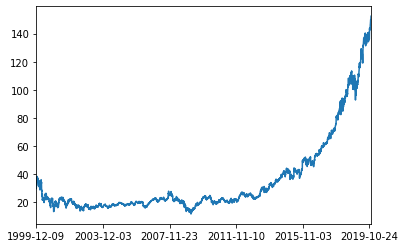

In [12]:
df.sort_index(inplace=True)
df[0].astype('float').plot()

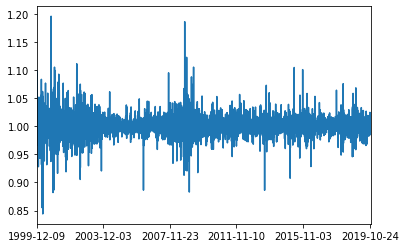

In [13]:
div.sort_index(inplace=True)
div.plot()

In [14]:
div.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99])

count    5024.000000
mean        1.000506
std         0.019073
min         0.843932
1%          0.945991
10%         0.981155
25%         0.991930
50%         1.000331
75%         1.008974
90%         1.019987
95%         1.028962
99%         1.056002
max         1.195749
Name: 0, dtype: float64

In [15]:
div

1999-12-09         NaN
1999-12-10    1.012077
1999-12-13    1.029294
1999-12-14    1.021423
1999-12-15    1.098795
                ...   
2019-11-21    0.999064
2019-11-22    1.000736
2019-11-25    1.010963
2019-11-26    1.005290
2019-11-27    1.001908
Name: 0, Length: 5025, dtype: float64

In [16]:
dateAnnotated = {}

dateAnnotated[2] = annotateBuyOrSellTwoClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotated[2], orient='index')
df[0].value_counts()

S    2579
B    2445
Name: 0, dtype: int64

In [17]:
dateAnnotated[8] = annotateBuyOrSellEightClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotated[8], orient='index')
df[0].value_counts()

S0    806
B0    790
S2    663
S1    624
B1    608
B2    571
S3    486
B3    476
Name: 0, dtype: int64

In [18]:
import pandas as pd

normalizedIndicators = {}
normalizedIndicators[2] = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated[2])
normalizedIndicators[8] = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated[8])

data = {}
data[2] = pd.DataFrame.from_dict(normalizedIndicators[2], orient='index')
data[8] = pd.DataFrame.from_dict(normalizedIndicators[8], orient='index')

Normalizing and annotating indicators
Normalizing and annotating indicators


In [19]:
data[2] = pd.DataFrame.merge(pd.DataFrame(data[2].indicators.values.tolist(), index=data[2].index), data[2], left_index=True, right_index=True, how='outer').drop(columns=['indicators'])
data[8] = pd.DataFrame.merge(pd.DataFrame(data[8].indicators.values.tolist(), index=data[8].index), data[8], left_index=True, right_index=True, how='outer').drop(columns=['indicators'])

In [20]:
data[2].head(), data[8].head()

(                 SMA       EMA      MACD       RSI       ADX       CCI  \
 2019-11-27  0.985012  0.983612  0.017403  0.512444  0.311414  0.866719   
 2019-11-26  0.983214  0.981825  0.016853  0.495326  0.305269  1.024783   
 2019-11-25  0.985056  0.983944  0.016601  0.467260  0.299686  0.683459   
 2019-11-22  0.992740  0.992951  0.017023  0.476531  0.299539  0.314531   
 2019-11-21  0.989397  0.991400  0.017046  0.461161  0.301322  0.302405   
 
                  MOM     WILLR annotation  
 2019-11-27  0.036699 -0.021486          S  
 2019-11-26  0.033414 -0.041780          S  
 2019-11-25  0.030814 -0.015000          S  
 2019-11-22  0.040711 -0.176239          S  
 2019-11-21  0.037196 -0.163491          B  ,
                  SMA       EMA      MACD       RSI       ADX       CCI  \
 2019-11-27  0.985012  0.983612  0.017403  0.512444  0.311414  0.866719   
 2019-11-26  0.983214  0.981825  0.016853  0.495326  0.305269  1.024783   
 2019-11-25  0.985056  0.983944  0.016601  0.467260 

In [21]:
data[2].annotation = data[2].annotation.apply(lambda x: 0 if x == 'S' else 1)

eight_dict = {"B3":0, "B2": 1, "B1": 2, "B0": 3, "S0": 4, "S1": 5, "S2": 6, "S3": 7}
data[8].annotation = data[8].annotation.apply(lambda x: eight_dict[x])

In [22]:
data[2] = data[2].sort_index()
data[8] = data[8].sort_index()

In [23]:
data[2] = data[2].dropna()
data[8] = data[8].dropna()

In [24]:
len(data[2]), len(data[8])

(5001, 5001)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

data_analysis = pd.DataFrame.merge(data[2], div, left_index=True, right_index=True, how='inner')
X = data_analysis.iloc[:,:8]
y = data_analysis.iloc[:,-1:]

In [26]:
bestfeatures = SelectKBest(score_func=f_classif, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   Specs     Score
6    MOM  2.099666
0    SMA  1.770317
1    EMA  1.717687
7  WILLR  1.011445
5    CCI  0.948976
3    RSI  0.946421
2   MACD  0.907235
4    ADX  0.876328


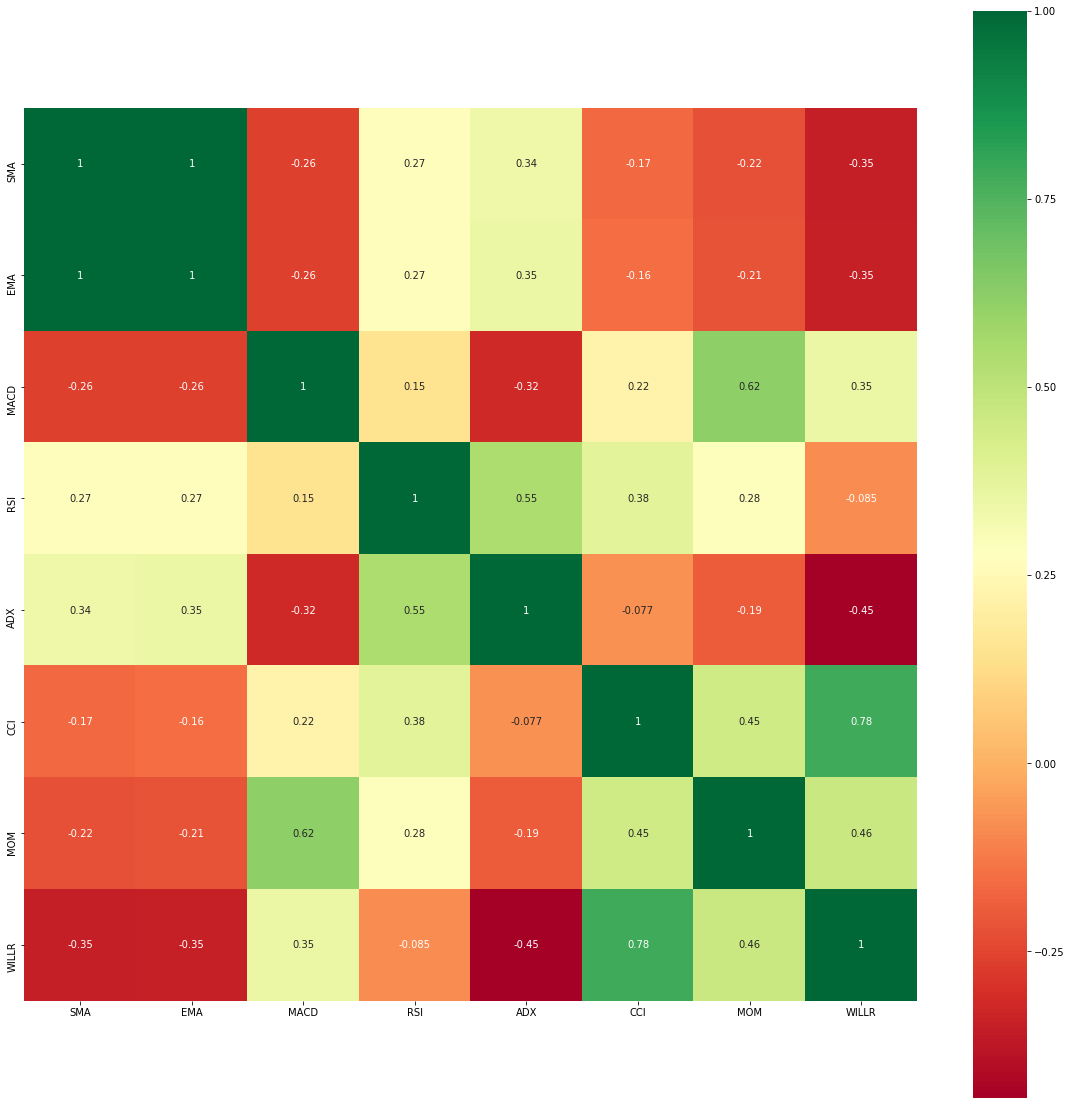

In [27]:
corrmat = data_analysis.iloc[:,:8].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
plt.axis('scaled')
g=sns.heatmap(data_analysis[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
import numpy as np
import matplotlib.pyplot as plt

models = ["mlp","lstm"]
classes = {2: ["S","B"],
           8: ["B3","B2","B1","B0","S0","S1","S2","S3"]}
n_classes = [2, 8]
n_steps = [2,5,10]
n_indicators = [3, 6]
n_indicators_names = {
    3: ['SMA','MOM','WILLR'], 
    6: ['SMA','MOM','WILLR', 'MACD','ADX','RSI']
}

batch_size = 32
train_split = .8

# X [d: (all, train, test)] [m: type(mlp/lstm)] [c: classes(2, 8)] [s: n_steps(2,5,10)] [i: indicators(3, 6)] 

In [29]:
X = {}
y = {}
for a in ["all", "train", "test"]:
    X[a] = {}
    y[a] = {}
    for m in models:
        X[a][m] = {}
        y[a][m] = {}
        for c in n_classes:
            X[a][m][c] = {}
            y[a][m][c] = {}
            for s in n_steps:
                X[a][m][c][s] = {}
                y[a][m][c][s] = {}
                for i in n_indicators:
                    X[a][m][c][s][i] = []
                    y[a][m][c][s][i] = []
                    if a == "all":
                        for d in range(len(data[c])):
                            end_ix = d + s
                            if end_ix > len(data[c]):
                                break
                            seq_x, seq_y = data[c].loc[data[c].index.isin(data[c].index[d:end_ix]), n_indicators_names[i]].values, data[c].iloc[end_ix-1, -1]
                            if m == "lstm":
                                X[a][m][c][s][i].append(seq_x)
                            else:
                                X[a][m][c][s][i].append(seq_x.flatten())
                            if c == 2:
                                y[a][m][c][s][i].append(seq_y)
                            else:
                                y[a][m][c][s][i].append(np.eye(c)[seq_y])
                        X[a][m][c][s][i] = np.array(X[a][m][c][s][i])
                        y[a][m][c][s][i] = np.array(y[a][m][c][s][i])

In [30]:
a = 'all'
for m in models:
    for c in n_classes:
        for s in n_steps:
            for i in n_indicators:
                print(X[a][m][c][s][i].shape, y[a][m][c][s][i].shape)

(5000, 6) (5000,)
(5000, 12) (5000,)
(4997, 15) (4997,)
(4997, 30) (4997,)
(4992, 30) (4992,)
(4992, 60) (4992,)
(5000, 6) (5000, 8)
(5000, 12) (5000, 8)
(4997, 15) (4997, 8)
(4997, 30) (4997, 8)
(4992, 30) (4992, 8)
(4992, 60) (4992, 8)
(5000, 2, 3) (5000,)
(5000, 2, 6) (5000,)
(4997, 5, 3) (4997,)
(4997, 5, 6) (4997,)
(4992, 10, 3) (4992,)
(4992, 10, 6) (4992,)
(5000, 2, 3) (5000, 8)
(5000, 2, 6) (5000, 8)
(4997, 5, 3) (4997, 8)
(4997, 5, 6) (4997, 8)
(4992, 10, 3) (4992, 8)
(4992, 10, 6) (4992, 8)


In [31]:
data[2].head()

,SMA,EMA,MACD,RSI,ADX,CCI,MOM,WILLR,annotation
2000-01-13,3.217237,3.180572,0.131590,1.089985,0.968186,-3.875505,-0.388427,-1.816758,0
2000-01-14,3.061486,3.037917,0.107953,1.234211,0.871520,-0.304394,-0.284909,-1.028212,0
2000-01-18,2.965284,2.966479,0.099748,1.448182,0.765217,3.080178,-0.149569,-0.311719,0
2000-01-19,3.186711,3.198058,0.098732,1.483207,0.804172,-1.990862,-0.088710,-1.836041,1
2000-01-20,3.204895,3.210909,0.083568,1.307833,0.794359,-2.210637,-0.118810,-2.048455,1


In [32]:
X["all"]["lstm"][2][5][6][0]

array([[ 3.21723693, -0.38842661, -1.81675759,  0.1315903 ,  0.96818642,
         1.0899855 ],
       [ 3.06148617, -0.28490895, -1.02821179,  0.10795313,  0.87152016,
         1.23421118],
       [ 2.96528441, -0.14956891, -0.31171937,  0.09974848,  0.76521716,
         1.44818217],
       [ 3.18671092, -0.08870979, -1.83604053,  0.09873168,  0.80417168,
         1.48320747],
       [ 3.20489522, -0.11881037, -2.04845473,  0.08356817,  0.79435856,
         1.307833  ]])

In [33]:
X["all"]["mlp"][2][2][6][0]

array([ 3.21723693, -0.38842661, -1.81675759,  0.1315903 ,  0.96818642,
        1.0899855 ,  3.06148617, -0.28490895, -1.02821179,  0.10795313,
        0.87152016,  1.23421118])

In [34]:
from sklearn.model_selection import train_test_split

for m in models:
    for c in n_classes:
        for s in n_steps:
            for i in n_indicators:
                if m == "mlp":
                    X['train'][m][c][s][i], X['test'][m][c][s][i], y['train'][m][c][s][i], y['test'][m][c][s][i] = train_test_split(X['all'][m][c][s][i], y['all'][m][c][s][i], train_size=train_split, random_state=0)
                else:
                    X['train'][m][c][s][i] = X['all'][m][c][s][i][:int(len(X['all'][m][c][s][i])*train_split)]
                    X['test'][m][c][s][i] = X['all'][m][c][s][i][int(len(X['all'][m][c][s][i])*train_split):]
                    y['train'][m][c][s][i] = y['all'][m][c][s][i][:int(len(y['all'][m][c][s][i])*train_split)]
                    y['test'][m][c][s][i] = y['all'][m][c][s][i][int(len(y['all'][m][c][s][i])*train_split):]

In [35]:
for a in ['train','test']:
    for m in models:
        for c in n_classes:
            for s in n_steps:
                for i in n_indicators:
                    print(X[a][m][c][s][i].shape, y[a][m][c][s][i].shape)

(4000, 6) (4000,)
(4000, 12) (4000,)
(3997, 15) (3997,)
(3997, 30) (3997,)
(3993, 30) (3993,)
(3993, 60) (3993,)
(4000, 6) (4000, 8)
(4000, 12) (4000, 8)
(3997, 15) (3997, 8)
(3997, 30) (3997, 8)
(3993, 30) (3993, 8)
(3993, 60) (3993, 8)
(4000, 2, 3) (4000,)
(4000, 2, 6) (4000,)
(3997, 5, 3) (3997,)
(3997, 5, 6) (3997,)
(3993, 10, 3) (3993,)
(3993, 10, 6) (3993,)
(4000, 2, 3) (4000, 8)
(4000, 2, 6) (4000, 8)
(3997, 5, 3) (3997, 8)
(3997, 5, 6) (3997, 8)
(3993, 10, 3) (3993, 8)
(3993, 10, 6) (3993, 8)
(1000, 6) (1000,)
(1000, 12) (1000,)
(1000, 15) (1000,)
(1000, 30) (1000,)
(999, 30) (999,)
(999, 60) (999,)
(1000, 6) (1000, 8)
(1000, 12) (1000, 8)
(1000, 15) (1000, 8)
(1000, 30) (1000, 8)
(999, 30) (999, 8)
(999, 60) (999, 8)
(1000, 2, 3) (1000,)
(1000, 2, 6) (1000,)
(1000, 5, 3) (1000,)
(1000, 5, 6) (1000,)
(999, 10, 3) (999,)
(999, 10, 6) (999,)
(1000, 2, 3) (1000, 8)
(1000, 2, 6) (1000, 8)
(1000, 5, 3) (1000, 8)
(1000, 5, 6) (1000, 8)
(999, 10, 3) (999, 8)
(999, 10, 6) (999, 8)


In [36]:
Models = {}
for m in models:
    Models[m] = {}
    for c in n_classes:
        Models[m][c] = {}
        for s in n_steps:
            Models[m][c][s] = {}
            for i in n_indicators:
                Models[m][c][s][i] = {}
                if c == 2:
                    out = 1
                else:
                    out = c
                if m == "mlp":
                    Models[m][c][s][i] = getModelMLP(s, i, out)
                else:
                    Models[m][c][s][i] = getModelBidirectionalLSTM(s, i, out)

In [37]:
for m in models:
    for c in n_classes:
        for s in n_steps:
            for i in n_indicators:
                print(Models[m][c][s][i])

In [38]:
history = {}
preds = {}
conf = {}
for m in models:
    history[m] = {}
    preds[m] = {}
    conf[m] = {}
    for c in n_classes:
        history[m][c] = {}
        preds[m][c] = {}
        conf[m][c] = {}
        for s in n_steps:
            history[m][c][s] = {}
            preds[m][c][s] = {}
            conf[m][c][s] = {}
            for i in n_indicators:
                history[m][c][s][i] = {}
                preds[m][c][s][i] = {}
                conf[m][c][s][i] = {}

In [39]:
# Calculando lucro/prejuízo total, supondo que inicialmente temos US$1000 em carteira
import copy

def calculateProfit(preds, stockPrices):
    classificationArray = list(np.argmax(preds["lstm"][8], axis=1))

    prices = copy.deepcopy(stockPrices)

    for date in sorted(stockPrices.keys()):
        if len(prices) == len(classificationArray):
            break
        del prices[date]

    initialMoney = 1000.00
    index = 0
    currentMoney = initialMoney
    currentStocks = 0.0

    for date in sorted(prices.keys()):
        stockPrice = float(prices[date])
        classification = classificationArray[index]
        # Caso de compra
        if currentMoney != 0 and (classification == 0 or classification == 1 or classification == 2 or classification == 3):
            currentStocks = currentMoney/stockPrice
            currentMoney = 0.0
        elif currentStocks != 0 and (classification == 4 or classification == 5 or classification == 6 or classification == 7):
            currentMoney = currentStocks*stockPrice
            currentStocks = 0.0
        index += 1

    firstPrice = float(prices[sorted(prices.keys())[0]])
    lastPrice = float(prices[sorted(prices.keys())[-1]])

    if currentMoney == 0:
        finalMoney = currentStocks*lastPrice

    growthPercentage = 100.0*((finalMoney-initialMoney)/initialMoney)
    timeLenInYears = len(prices)/252.0

    print("[DEBUG] Current money:\t   US$ " + str(round(currentMoney, 2)))
    print("[DEBUG] Current stocks:\t   " + str(round(currentStocks, 2)) + "\t| Last stock-price: US$ " + str(round(lastPrice, 2)))
    print("First date:\t   " + sorted(prices.keys())[1] + "\t| Initial stock value: US$ " + firstPrice)
    print("Last date:\t   " + sorted(prices.keys())[-1] + "\t| Final stock value: US$ " + lastPrice)
    print("Initial money:    US$ " + str(round(initialMoney, 2)) + " | Final money: US$ " + str(round(finalMoney, 2)))
    print("Final profit:\t   US$ " + str(round(finalMoney-initialMoney, 2)) + " over " + str(round(timeLenInYears, 2)) + " years")
    print("Growth percentage: " + str(round(growthPercentage, 2)) + "%")
    print("Growth per year:   US$ " + str(round((finalMoney-initialMoney)/timeLenInYears, 2)))

In [40]:
def fit(m, c, s, i):
    history[m][c][s][i] = Models[m][c][s][i].fit(
        X['train'][m][c][s][i], 
        y['train'][m][c][s][i], 
        epochs=300, 
        verbose=1,
        batch_size=batch_size)
    plt.plot(history[m][c][s][i].history['loss'], label='train')
#     plt.plot(history[m][c][s][i].history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
def predict(m, c, s, i):
    preds[m][c][s][i] = Models[m][c][s][i].predict(
        X['test'][m][c][s][i], 
        batch_size=batch_size)
    print(f"Model {m}\nNumber of classes {c}\nNumber of steps {s}\nNumber of indicators {i}")
    print(classification_report(y['test'][m][c][s][i], 
                                np.rint(preds[m][c][s][i]).astype(np.int64), 
                                target_names=classes[c], 
                                digits=5))
    if c == 2:
        conf[m][c][s][i] = plot_confusion_matrix(y['test'][m][c][s][i], 
                                                 np.rint(preds[m][c][s][i]).astype(np.int64), 
                                                 classes=np.array(classes[c]))
    else:
        conf[m][c][s][i] = plot_confusion_matrix(y['test'][m][c][s][i].argmax(axis=1), 
                                                 np.rint(preds[m][c][s][i]).argmax(axis=1), 
                                                 classes=np.array(classes[c]))
        
def get_next_value(m, c, s, i):
    i = n_indicators[(n_indicators.index(i) + 1)%len(n_indicators)]
    if (n_indicators.index(i) == 0):
        s = n_steps[(n_steps.index(s) + 1)%len(n_steps)]
        if (n_steps.index(s) == 0):
            c = n_classes[(n_classes.index(c) + 1)%len(n_classes)]
            if (n_classes.index(c) == 0):
                m = models[(models.index(m) + 1)%len(models)]    
    return m, c, s, i

In [41]:
m = models[0]
c = n_classes[0]
s = n_steps[0]
i = n_indicators[0]

for x in range(36):
    Models[m][c][s][i].summary()
    m, c, s, i = get_next_value(m, c, s, i)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Outpu

Epoch 1/300
4000/4000 [==============================] - 0s 98us/step - loss: 0.7092 - accuracy: 0.5180
Epoch 2/300
4000/4000 [==============================] - 0s 40us/step - loss: 0.6163 - accuracy: 0.6898
Epoch 3/300
4000/4000 [==============================] - 0s 38us/step - loss: 0.5612 - accuracy: 0.7657
Epoch 4/300
4000/4000 [==============================] - 0s 38us/step - loss: 0.4892 - accuracy: 0.8138
Epoch 5/300
4000/4000 [==============================] - 0s 40us/step - loss: 0.4268 - accuracy: 0.8292
Epoch 6/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.3952 - accuracy: 0.8350
Epoch 7/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.3643 - accuracy: 0.8560
Epoch 8/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.3565 - accuracy: 0.8650
Epoch 9/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.3505 - accuracy: 0.8650
Epoch 10/300
4000/4000 [==============================] - 0s 36u

4000/4000 [==============================] - 0s 35us/step - loss: 0.2879 - accuracy: 0.8903
Epoch 80/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2871 - accuracy: 0.8945
Epoch 81/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2908 - accuracy: 0.8935
Epoch 82/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2809 - accuracy: 0.8942
Epoch 83/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2892 - accuracy: 0.8963
Epoch 84/300
4000/4000 [==============================] - 0s 48us/step - loss: 0.2898 - accuracy: 0.8930
Epoch 85/300
4000/4000 [==============================] - 0s 45us/step - loss: 0.2860 - accuracy: 0.8930
Epoch 86/300
4000/4000 [==============================] - 0s 44us/step - loss: 0.2881 - accuracy: 0.8923
Epoch 87/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2847 - accuracy: 0.8928
Epoch 88/300
4000/4000 [==============================] - 0s 37us/st

4000/4000 [==============================] - 0s 38us/step - loss: 0.2803 - accuracy: 0.8953
Epoch 157/300
4000/4000 [==============================] - 0s 38us/step - loss: 0.2799 - accuracy: 0.8970
Epoch 158/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2857 - accuracy: 0.8940
Epoch 159/300
4000/4000 [==============================] - 0s 38us/step - loss: 0.2755 - accuracy: 0.8940
Epoch 160/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2721 - accuracy: 0.8963
Epoch 161/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2742 - accuracy: 0.8970
Epoch 162/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2752 - accuracy: 0.9003
Epoch 163/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2790 - accuracy: 0.8970
Epoch 164/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2683 - accuracy: 0.9005
Epoch 165/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 38us/step - loss: 0.2685 - accuracy: 0.8972
Epoch 234/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2731 - accuracy: 0.9000
Epoch 235/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2822 - accuracy: 0.8960
Epoch 236/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2753 - accuracy: 0.8988
Epoch 237/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2781 - accuracy: 0.8963
Epoch 238/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2778 - accuracy: 0.8982
Epoch 239/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2727 - accuracy: 0.8985
Epoch 240/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2747 - accuracy: 0.8950
Epoch 241/300
4000/4000 [==============================] - 0s 35us/step - loss: 0.2693 - accuracy: 0.8975
Epoch 242/300
4000/4000 [==============================] - 0

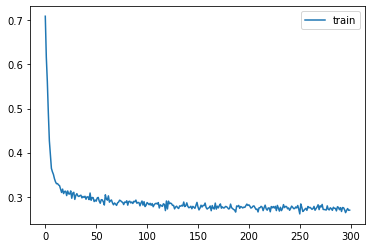

In [42]:
m = models[0]
c = n_classes[0]
s = n_steps[0]
i = n_indicators[0]

fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 2
Number of indicators 3
              precision    recall  f1-score   support

           S    0.90310   0.92277   0.91283       505
           B    0.91942   0.89899   0.90909       495

    accuracy                        0.91100      1000
   macro avg    0.91126   0.91088   0.91096      1000
weighted avg    0.91118   0.91100   0.91098      1000

Confusion matrix, without normalization
[[466  39]
 [ 50 445]]


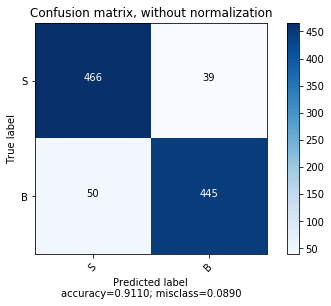

In [43]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 0s 94us/step - loss: 0.5389 - accuracy: 0.7245
Epoch 2/300
4000/4000 [==============================] - 0s 42us/step - loss: 0.3772 - accuracy: 0.8342
Epoch 3/300
4000/4000 [==============================] - 0s 41us/step - loss: 0.3347 - accuracy: 0.8645
Epoch 4/300
4000/4000 [==============================] - 0s 41us/step - loss: 0.3120 - accuracy: 0.8755
Epoch 5/300
4000/4000 [==============================] - 0s 43us/step - loss: 0.3149 - accuracy: 0.8733
Epoch 6/300
4000/4000 [==============================] - 0s 40us/step - loss: 0.3055 - accuracy: 0.8870
Epoch 7/300
4000/4000 [==============================] - 0s 40us/step - loss: 0.2955 - accuracy: 0.8863
Epoch 8/300
4000/4000 [==============================] - 0s 41us/step - loss: 0.2895 - accuracy: 0.8900
Epoch 9/300
4000/4000 [==============================] - 0s 40us/step - loss: 0.2859 - accuracy: 0.8880
Epoch 10/300
4000/4000 [==============================] - 0s 40u

4000/4000 [==============================] - 0s 37us/step - loss: 0.2439 - accuracy: 0.9050
Epoch 80/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2463 - accuracy: 0.9000
Epoch 81/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2427 - accuracy: 0.9075
Epoch 82/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2413 - accuracy: 0.9075
Epoch 83/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2421 - accuracy: 0.9043
Epoch 84/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2502 - accuracy: 0.9053
Epoch 85/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2482 - accuracy: 0.9030
Epoch 86/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2467 - accuracy: 0.9057
Epoch 87/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2398 - accuracy: 0.9065
Epoch 88/300
4000/4000 [==============================] - 0s 37us/st

4000/4000 [==============================] - 0s 37us/step - loss: 0.2344 - accuracy: 0.9120
Epoch 157/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2467 - accuracy: 0.9045
Epoch 158/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2348 - accuracy: 0.9103
Epoch 159/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2371 - accuracy: 0.9100
Epoch 160/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2341 - accuracy: 0.9103
Epoch 161/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2392 - accuracy: 0.9087
Epoch 162/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2321 - accuracy: 0.9097
Epoch 163/300
4000/4000 [==============================] - 0s 38us/step - loss: 0.2387 - accuracy: 0.9055
Epoch 164/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2374 - accuracy: 0.9038
Epoch 165/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 38us/step - loss: 0.2379 - accuracy: 0.9053
Epoch 234/300
4000/4000 [==============================] - 0s 36us/step - loss: 0.2371 - accuracy: 0.9087
Epoch 235/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2316 - accuracy: 0.9080
Epoch 236/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2346 - accuracy: 0.9112
Epoch 237/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2360 - accuracy: 0.9128
Epoch 238/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2360 - accuracy: 0.9070
Epoch 239/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2347 - accuracy: 0.9068
Epoch 240/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2386 - accuracy: 0.9053
Epoch 241/300
4000/4000 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.9093
Epoch 242/300
4000/4000 [==============================] - 0

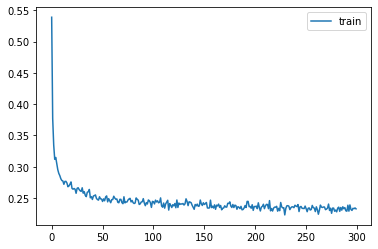

In [44]:
fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 2
Number of indicators 6
              precision    recall  f1-score   support

           S    0.90323   0.94257   0.92248       505
           B    0.93869   0.89697   0.91736       495

    accuracy                        0.92000      1000
   macro avg    0.92096   0.91977   0.91992      1000
weighted avg    0.92078   0.92000   0.91994      1000

Confusion matrix, without normalization
[[476  29]
 [ 51 444]]


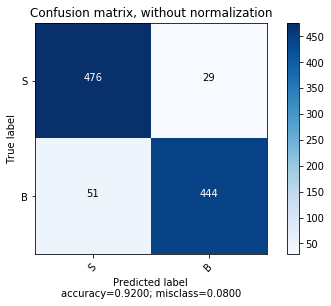

In [45]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 0s 100us/step - loss: 0.5761 - accuracy: 0.6998
Epoch 2/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.4163 - accuracy: 0.8206
Epoch 3/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.3646 - accuracy: 0.8454
Epoch 4/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.3327 - accuracy: 0.8644
Epoch 5/300
3997/3997 [==============================] - 0s 43us/step - loss: 0.3188 - accuracy: 0.8684
Epoch 6/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.3089 - accuracy: 0.8817
Epoch 7/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.3064 - accuracy: 0.8767
Epoch 8/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.3030 - accuracy: 0.8814
Epoch 9/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.3001 - accuracy: 0.8799
Epoch 10/300
3997/3997 [==============================] - 0s 41

3997/3997 [==============================] - 0s 37us/step - loss: 0.2517 - accuracy: 0.9027
Epoch 80/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2585 - accuracy: 0.8977
Epoch 81/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2616 - accuracy: 0.8967
Epoch 82/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2494 - accuracy: 0.9052
Epoch 83/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2525 - accuracy: 0.9052
Epoch 84/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2508 - accuracy: 0.9012
Epoch 85/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2547 - accuracy: 0.9029
Epoch 86/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2469 - accuracy: 0.9094
Epoch 87/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2508 - accuracy: 0.9027
Epoch 88/300
3997/3997 [==============================] - 0s 37us/st

3997/3997 [==============================] - 0s 39us/step - loss: 0.2483 - accuracy: 0.9054
Epoch 157/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2425 - accuracy: 0.9067
Epoch 158/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2511 - accuracy: 0.9009
Epoch 159/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2440 - accuracy: 0.9024
Epoch 160/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2401 - accuracy: 0.9049
Epoch 161/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2403 - accuracy: 0.9022
Epoch 162/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2416 - accuracy: 0.9072
Epoch 163/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2483 - accuracy: 0.9042
Epoch 164/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2493 - accuracy: 0.9037
Epoch 165/300
3997/3997 [==============================] - 0

3997/3997 [==============================] - 0s 38us/step - loss: 0.2442 - accuracy: 0.9037
Epoch 234/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2462 - accuracy: 0.9047
Epoch 235/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2537 - accuracy: 0.9009
Epoch 236/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2435 - accuracy: 0.9044
Epoch 237/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2407 - accuracy: 0.9024
Epoch 238/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2410 - accuracy: 0.9052
Epoch 239/300
3997/3997 [==============================] - 0s 36us/step - loss: 0.2499 - accuracy: 0.9017
Epoch 240/300
3997/3997 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.9107
Epoch 241/300
3997/3997 [==============================] - 0s 37us/step - loss: 0.2395 - accuracy: 0.9064
Epoch 242/300
3997/3997 [==============================] - 0

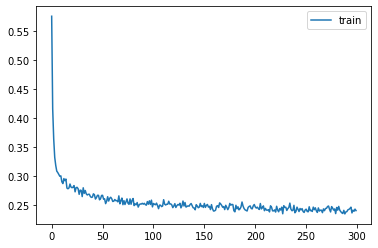

In [46]:
fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 5
Number of indicators 3
              precision    recall  f1-score   support

           S    0.92593   0.89286   0.90909       504
           B    0.89494   0.92742   0.91089       496

    accuracy                        0.91000      1000
   macro avg    0.91043   0.91014   0.90999      1000
weighted avg    0.91056   0.91000   0.90998      1000

Confusion matrix, without normalization
[[450  54]
 [ 36 460]]


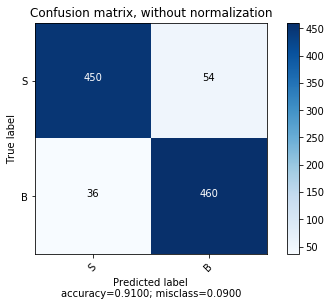

In [47]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 0s 100us/step - loss: 0.5696 - accuracy: 0.6995
Epoch 2/300
3997/3997 [==============================] - 0s 44us/step - loss: 0.4167 - accuracy: 0.8129
Epoch 3/300
3997/3997 [==============================] - 0s 44us/step - loss: 0.3468 - accuracy: 0.8491
Epoch 4/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.3189 - accuracy: 0.8722
Epoch 5/300
3997/3997 [==============================] - 0s 43us/step - loss: 0.3201 - accuracy: 0.8742
Epoch 6/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.3038 - accuracy: 0.8734
Epoch 7/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.2976 - accuracy: 0.8757
Epoch 8/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.2950 - accuracy: 0.8817
Epoch 9/300
3997/3997 [==============================] - 0s 41us/step - loss: 0.3013 - accuracy: 0.8769
Epoch 10/300
3997/3997 [==============================] - 0s 41

3997/3997 [==============================] - 0s 41us/step - loss: 0.2361 - accuracy: 0.9049
Epoch 80/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2284 - accuracy: 0.9122
Epoch 81/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2347 - accuracy: 0.9057
Epoch 82/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2389 - accuracy: 0.9057
Epoch 83/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2409 - accuracy: 0.9034
Epoch 84/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2311 - accuracy: 0.9047
Epoch 85/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2289 - accuracy: 0.9089
Epoch 86/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2458 - accuracy: 0.8992
Epoch 87/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2281 - accuracy: 0.9097
Epoch 88/300
3997/3997 [==============================] - 0s 38us/st

3997/3997 [==============================] - 0s 39us/step - loss: 0.2178 - accuracy: 0.9059
Epoch 157/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2252 - accuracy: 0.9092
Epoch 158/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2317 - accuracy: 0.9029
Epoch 159/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2224 - accuracy: 0.9059
Epoch 160/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2232 - accuracy: 0.9067
Epoch 161/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2232 - accuracy: 0.9132
Epoch 162/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2227 - accuracy: 0.9114
Epoch 163/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.2247 - accuracy: 0.9117
Epoch 164/300
3997/3997 [==============================] - 0s 42us/step - loss: 0.2140 - accuracy: 0.9142
Epoch 165/300
3997/3997 [==============================] - 0

3997/3997 [==============================] - 0s 40us/step - loss: 0.2230 - accuracy: 0.9139
Epoch 234/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2177 - accuracy: 0.9157
Epoch 235/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2207 - accuracy: 0.9142
Epoch 236/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2243 - accuracy: 0.9079
Epoch 237/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2169 - accuracy: 0.9084
Epoch 238/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2250 - accuracy: 0.9067
Epoch 239/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2159 - accuracy: 0.9157
Epoch 240/300
3997/3997 [==============================] - 0s 39us/step - loss: 0.2214 - accuracy: 0.9072
Epoch 241/300
3997/3997 [==============================] - 0s 40us/step - loss: 0.2165 - accuracy: 0.9107
Epoch 242/300
3997/3997 [==============================] - 0

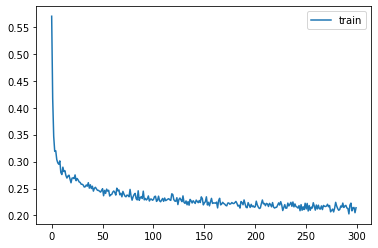

In [48]:
fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 5
Number of indicators 6
              precision    recall  f1-score   support

           S    0.94725   0.85516   0.89885       504
           B    0.86606   0.95161   0.90682       496

    accuracy                        0.90300      1000
   macro avg    0.90665   0.90339   0.90284      1000
weighted avg    0.90698   0.90300   0.90280      1000

Confusion matrix, without normalization
[[431  73]
 [ 24 472]]


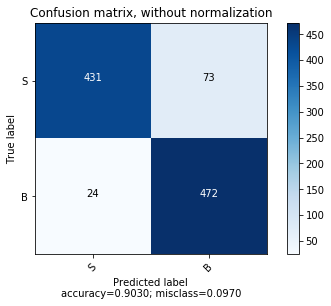

In [49]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 0s 99us/step - loss: 0.5795 - accuracy: 0.6955
Epoch 2/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.4339 - accuracy: 0.8067
Epoch 3/300
3993/3993 [==============================] - 0s 42us/step - loss: 0.3706 - accuracy: 0.8387
Epoch 4/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3387 - accuracy: 0.8570
Epoch 5/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3327 - accuracy: 0.8618
Epoch 6/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3238 - accuracy: 0.8668
Epoch 7/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3139 - accuracy: 0.8708
Epoch 8/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3026 - accuracy: 0.8755
Epoch 9/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.3026 - accuracy: 0.8768
Epoch 10/300
3993/3993 [==============================] - 0s 41u

3993/3993 [==============================] - 0s 40us/step - loss: 0.2380 - accuracy: 0.9038
Epoch 80/300
3993/3993 [==============================] - 0s 40us/step - loss: 0.2441 - accuracy: 0.9031
Epoch 81/300
3993/3993 [==============================] - 0s 40us/step - loss: 0.2299 - accuracy: 0.9106
Epoch 82/300
3993/3993 [==============================] - 0s 38us/step - loss: 0.2350 - accuracy: 0.9058
Epoch 83/300
3993/3993 [==============================] - 0s 40us/step - loss: 0.2319 - accuracy: 0.9071
Epoch 84/300
3993/3993 [==============================] - 0s 39us/step - loss: 0.2339 - accuracy: 0.9088
Epoch 85/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.2314 - accuracy: 0.9071
Epoch 86/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.2284 - accuracy: 0.9133
Epoch 87/300
3993/3993 [==============================] - 0s 41us/step - loss: 0.2283 - accuracy: 0.9103
Epoch 88/300
3993/3993 [==============================] - 0s 41us/st

3993/3993 [==============================] - 0s 43us/step - loss: 0.2203 - accuracy: 0.9033
Epoch 157/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2113 - accuracy: 0.9159
Epoch 158/300
3993/3993 [==============================] - 0s 44us/step - loss: 0.2092 - accuracy: 0.9159
Epoch 159/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2226 - accuracy: 0.9108
Epoch 160/300
3993/3993 [==============================] - 0s 42us/step - loss: 0.2205 - accuracy: 0.9108
Epoch 161/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2196 - accuracy: 0.9088
Epoch 162/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2110 - accuracy: 0.9191
Epoch 163/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2170 - accuracy: 0.9136
Epoch 164/300
3993/3993 [==============================] - 0s 43us/step - loss: 0.2093 - accuracy: 0.9133
Epoch 165/300
3993/3993 [==============================] - 0

3993/3993 [==============================] - 0s 45us/step - loss: 0.2102 - accuracy: 0.9151
Epoch 234/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2078 - accuracy: 0.9108
Epoch 235/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2112 - accuracy: 0.9121
Epoch 236/300
3993/3993 [==============================] - 0s 46us/step - loss: 0.2094 - accuracy: 0.9136
Epoch 237/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2091 - accuracy: 0.9149
Epoch 238/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2018 - accuracy: 0.9201
Epoch 239/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2067 - accuracy: 0.9133
Epoch 240/300
3993/3993 [==============================] - 0s 45us/step - loss: 0.2067 - accuracy: 0.9159
Epoch 241/300
3993/3993 [==============================] - 0s 44us/step - loss: 0.2088 - accuracy: 0.9156
Epoch 242/300
3993/3993 [==============================] - 0

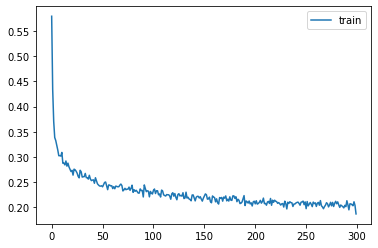

In [50]:
fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 10
Number of indicators 3
              precision    recall  f1-score   support

           S    0.93187   0.85141   0.88982       498
           B    0.86397   0.93812   0.89952       501

    accuracy                        0.89489       999
   macro avg    0.89792   0.89476   0.89467       999
weighted avg    0.89782   0.89489   0.89469       999

Confusion matrix, without normalization
[[424  74]
 [ 31 470]]


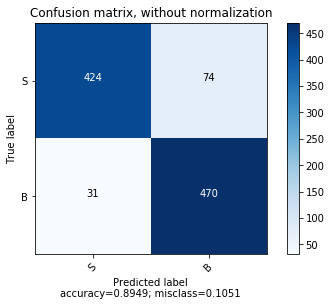

In [51]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 0s 103us/step - loss: 0.6006 - accuracy: 0.6857
Epoch 2/300
3993/3993 [==============================] - 0s 46us/step - loss: 0.4303 - accuracy: 0.8032
Epoch 3/300
3993/3993 [==============================] - 0s 47us/step - loss: 0.3717 - accuracy: 0.8347
Epoch 4/300
3993/3993 [==============================] - 0s 46us/step - loss: 0.3403 - accuracy: 0.8560
Epoch 5/300
3993/3993 [==============================] - 0s 46us/step - loss: 0.3292 - accuracy: 0.8643
Epoch 6/300
3993/3993 [==============================] - 0s 47us/step - loss: 0.3075 - accuracy: 0.8698
Epoch 7/300
3993/3993 [==============================] - 0s 49us/step - loss: 0.3148 - accuracy: 0.8655
Epoch 8/300
3993/3993 [==============================] - 0s 49us/step - loss: 0.3127 - accuracy: 0.8660
Epoch 9/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.3079 - accuracy: 0.8730
Epoch 10/300
3993/3993 [==============================] - 0s 51

3993/3993 [==============================] - 0s 55us/step - loss: 0.2380 - accuracy: 0.9033
Epoch 80/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2259 - accuracy: 0.9123
Epoch 81/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2233 - accuracy: 0.9138
Epoch 82/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.2378 - accuracy: 0.9036
Epoch 83/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2383 - accuracy: 0.9058
Epoch 84/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2279 - accuracy: 0.9083
Epoch 85/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2297 - accuracy: 0.9081
Epoch 86/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2307 - accuracy: 0.9053
Epoch 87/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2275 - accuracy: 0.9118
Epoch 88/300
3993/3993 [==============================] - 0s 51us/st

3993/3993 [==============================] - 0s 52us/step - loss: 0.2118 - accuracy: 0.9174
Epoch 157/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.2244 - accuracy: 0.9076
Epoch 158/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2177 - accuracy: 0.9184
Epoch 159/300
3993/3993 [==============================] - 0s 52us/step - loss: 0.2107 - accuracy: 0.9128
Epoch 160/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2169 - accuracy: 0.9088
Epoch 161/300
3993/3993 [==============================] - 0s 53us/step - loss: 0.2088 - accuracy: 0.9176
Epoch 162/300
3993/3993 [==============================] - 0s 54us/step - loss: 0.2217 - accuracy: 0.9091
Epoch 163/300
3993/3993 [==============================] - 0s 53us/step - loss: 0.2239 - accuracy: 0.9073
Epoch 164/300
3993/3993 [==============================] - 0s 54us/step - loss: 0.2182 - accuracy: 0.9144
Epoch 165/300
3993/3993 [==============================] - 0

3993/3993 [==============================] - 0s 52us/step - loss: 0.2116 - accuracy: 0.9128
Epoch 234/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.2089 - accuracy: 0.9166
Epoch 235/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.2037 - accuracy: 0.9206
Epoch 236/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2038 - accuracy: 0.9179
Epoch 237/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2033 - accuracy: 0.9221
Epoch 238/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.2068 - accuracy: 0.9186
Epoch 239/300
3993/3993 [==============================] - 0s 50us/step - loss: 0.1990 - accuracy: 0.9214
Epoch 240/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.1939 - accuracy: 0.9226
Epoch 241/300
3993/3993 [==============================] - 0s 51us/step - loss: 0.2143 - accuracy: 0.9123
Epoch 242/300
3993/3993 [==============================] - 0

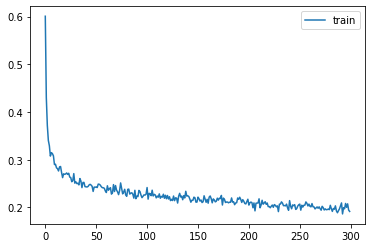

In [52]:
fit(m, c, s, i)

Model mlp
Number of classes 2
Number of steps 10
Number of indicators 6
              precision    recall  f1-score   support

           S    0.86923   0.90763   0.88802       498
           B    0.90397   0.86427   0.88367       501

    accuracy                        0.88589       999
   macro avg    0.88660   0.88595   0.88584       999
weighted avg    0.88665   0.88589   0.88584       999

Confusion matrix, without normalization
[[452  46]
 [ 68 433]]


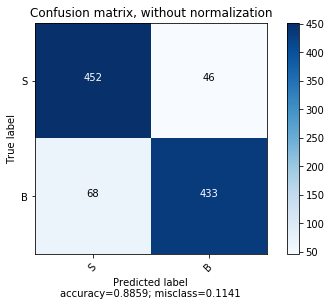

In [53]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 0s 89us/step - loss: 2.0298 - accuracy: 0.1817
Epoch 2/300
4000/4000 [==============================] - 0s 39us/step - loss: 1.8091 - accuracy: 0.2615
Epoch 3/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.7137 - accuracy: 0.2910
Epoch 4/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.6604 - accuracy: 0.3075
Epoch 5/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.6213 - accuracy: 0.3243
Epoch 6/300
4000/4000 [==============================] - 0s 41us/step - loss: 1.6030 - accuracy: 0.3435
Epoch 7/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.5925 - accuracy: 0.3478
Epoch 8/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.5723 - accuracy: 0.3537
Epoch 9/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.5578 - accuracy: 0.3640
Epoch 10/300
4000/4000 [==============================] - 0s 45u

4000/4000 [==============================] - 0s 45us/step - loss: 1.4700 - accuracy: 0.3950
Epoch 80/300
4000/4000 [==============================] - 0s 44us/step - loss: 1.4833 - accuracy: 0.3955
Epoch 81/300
4000/4000 [==============================] - 0s 45us/step - loss: 1.4604 - accuracy: 0.4035
Epoch 82/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4738 - accuracy: 0.4085
Epoch 83/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4649 - accuracy: 0.4013
Epoch 84/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4841 - accuracy: 0.3943
Epoch 85/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4656 - accuracy: 0.4038
Epoch 86/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4754 - accuracy: 0.4047
Epoch 87/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4737 - accuracy: 0.3960
Epoch 88/300
4000/4000 [==============================] - 0s 43us/st

4000/4000 [==============================] - 0s 43us/step - loss: 1.4606 - accuracy: 0.4033
Epoch 157/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4373 - accuracy: 0.4105
Epoch 158/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4460 - accuracy: 0.4120
Epoch 159/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4499 - accuracy: 0.3957
Epoch 160/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4615 - accuracy: 0.4080
Epoch 161/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4678 - accuracy: 0.4108
Epoch 162/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4551 - accuracy: 0.3977
Epoch 163/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4502 - accuracy: 0.4065
Epoch 164/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4531 - accuracy: 0.4105
Epoch 165/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 46us/step - loss: 1.4430 - accuracy: 0.4105
Epoch 234/300
4000/4000 [==============================] - 0s 44us/step - loss: 1.4355 - accuracy: 0.4117
Epoch 235/300
4000/4000 [==============================] - 0s 45us/step - loss: 1.4278 - accuracy: 0.4150
Epoch 236/300
4000/4000 [==============================] - 0s 44us/step - loss: 1.4347 - accuracy: 0.4165
Epoch 237/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4450 - accuracy: 0.4090
Epoch 238/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.4328 - accuracy: 0.4105
Epoch 239/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4343 - accuracy: 0.4092
Epoch 240/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4454 - accuracy: 0.4117
Epoch 241/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4263 - accuracy: 0.4070
Epoch 242/300
4000/4000 [==============================] - 0

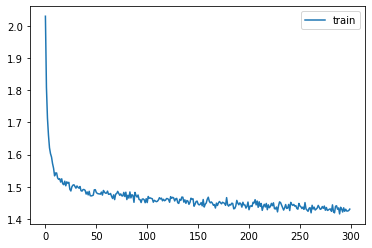

In [54]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 2
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.86486   0.31068   0.45714       103
          B2    0.00000   0.00000   0.00000       118
          B1    0.00000   0.00000   0.00000       115
          B0    0.00000   0.00000   0.00000       159
          S0    0.00000   0.00000   0.00000       164
          S1    0.00000   0.00000   0.00000       116
          S2    0.00000   0.00000   0.00000       127
          S3    0.90476   0.19388   0.31933        98

   micro avg    0.87931   0.05100   0.09641      1000
   macro avg    0.22120   0.06307   0.09706      1000
weighted avg    0.17775   0.05100   0.07838      1000
 samples avg    0.05100   0.05100   0.05100      1000

Confusion matrix, without normalization
[[103   0   0   0   0   0   0   0]
 [118   0   0   0   0   0   0   0]
 [115   0   0   0   0   0   0   0]
 [159   0   0   0   0   0   0   0]
 [164   0   0   0   0   0   0   0]
 [115   0

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


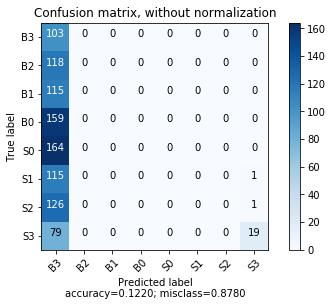

In [55]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 0s 87us/step - loss: 1.9133 - accuracy: 0.2140
Epoch 2/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.6820 - accuracy: 0.2982
Epoch 3/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.5773 - accuracy: 0.3290
Epoch 4/300
4000/4000 [==============================] - 0s 39us/step - loss: 1.5436 - accuracy: 0.3683
Epoch 5/300
4000/4000 [==============================] - 0s 38us/step - loss: 1.5174 - accuracy: 0.3740
Epoch 6/300
4000/4000 [==============================] - 0s 40us/step - loss: 1.4990 - accuracy: 0.3798
Epoch 7/300
4000/4000 [==============================] - 0s 41us/step - loss: 1.4862 - accuracy: 0.3808
Epoch 8/300
4000/4000 [==============================] - 0s 41us/step - loss: 1.4833 - accuracy: 0.3758
Epoch 9/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.4697 - accuracy: 0.3918
Epoch 10/300
4000/4000 [==============================] - 0s 43u

4000/4000 [==============================] - 0s 46us/step - loss: 1.3421 - accuracy: 0.4390
Epoch 80/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3410 - accuracy: 0.4470
Epoch 81/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3435 - accuracy: 0.4360
Epoch 82/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3467 - accuracy: 0.4440
Epoch 83/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3430 - accuracy: 0.4490
Epoch 84/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3458 - accuracy: 0.4455
Epoch 85/300
4000/4000 [==============================] - 0s 44us/step - loss: 1.3470 - accuracy: 0.4450
Epoch 86/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3551 - accuracy: 0.4450
Epoch 87/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3317 - accuracy: 0.4510
Epoch 88/300
4000/4000 [==============================] - 0s 42us/st

4000/4000 [==============================] - 0s 43us/step - loss: 1.3099 - accuracy: 0.4530
Epoch 157/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3135 - accuracy: 0.4448
Epoch 158/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3144 - accuracy: 0.4535
Epoch 159/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3255 - accuracy: 0.4397
Epoch 160/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3190 - accuracy: 0.4605
Epoch 161/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3152 - accuracy: 0.4572
Epoch 162/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3226 - accuracy: 0.4568
Epoch 163/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3172 - accuracy: 0.4585
Epoch 164/300
4000/4000 [==============================] - 0s 43us/step - loss: 1.3124 - accuracy: 0.4527
Epoch 165/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 43us/step - loss: 1.2893 - accuracy: 0.4645
Epoch 234/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.2996 - accuracy: 0.4715
Epoch 235/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3038 - accuracy: 0.4710
Epoch 236/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.2961 - accuracy: 0.4660
Epoch 237/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3010 - accuracy: 0.4720
Epoch 238/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3082 - accuracy: 0.4590
Epoch 239/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3061 - accuracy: 0.4518
Epoch 240/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.2985 - accuracy: 0.4665
Epoch 241/300
4000/4000 [==============================] - 0s 42us/step - loss: 1.3021 - accuracy: 0.4667
Epoch 242/300
4000/4000 [==============================] - 0

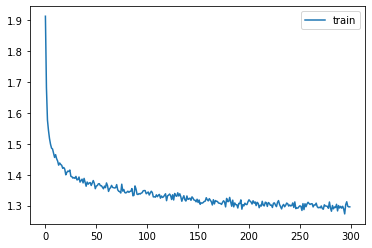

In [56]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 2
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.79310   0.44660   0.57143       103
          B2    0.00000   0.00000   0.00000       118
          B1    0.00000   0.00000   0.00000       115
          B0    0.70667   0.33333   0.45299       159
          S0    0.67901   0.33537   0.44898       164
          S1    0.00000   0.00000   0.00000       116
          S2    0.00000   0.00000   0.00000       127
          S3    0.87879   0.29592   0.44275        98

   micro avg    0.74089   0.18300   0.29350      1000
   macro avg    0.38220   0.17640   0.23952      1000
weighted avg    0.39153   0.18300   0.24790      1000
 samples avg    0.18300   0.18300   0.18300      1000

Confusion matrix, without normalization
[[102   0   0   1   0   0   0   0]
 [114   0   0   4   0   0   0   0]
 [105   0   0   9   1   0   0   0]
 [ 97   0   0  53   9   0   0   0]
 [104   0   0   5  55   0   0   0]
 [ 99   0

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


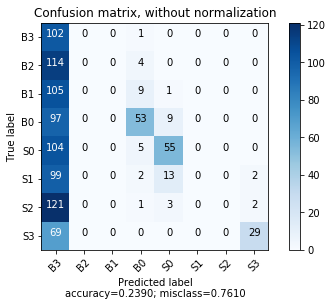

In [57]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 0s 86us/step - loss: 2.0004 - accuracy: 0.1981
Epoch 2/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.7666 - accuracy: 0.2712
Epoch 3/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.6690 - accuracy: 0.3042
Epoch 4/300
3997/3997 [==============================] - 0s 39us/step - loss: 1.6326 - accuracy: 0.3302
Epoch 5/300
3997/3997 [==============================] - 0s 37us/step - loss: 1.5883 - accuracy: 0.3405
Epoch 6/300
3997/3997 [==============================] - 0s 39us/step - loss: 1.5542 - accuracy: 0.3403
Epoch 7/300
3997/3997 [==============================] - 0s 40us/step - loss: 1.5459 - accuracy: 0.3650
Epoch 8/300
3997/3997 [==============================] - 0s 39us/step - loss: 1.5296 - accuracy: 0.3683
Epoch 9/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.5209 - accuracy: 0.3693
Epoch 10/300
3997/3997 [==============================] - 0s 42u

3997/3997 [==============================] - 0s 46us/step - loss: 1.3703 - accuracy: 0.4348
Epoch 80/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.3686 - accuracy: 0.4331
Epoch 81/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.3589 - accuracy: 0.4318
Epoch 82/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3758 - accuracy: 0.4358
Epoch 83/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3594 - accuracy: 0.4378
Epoch 84/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.3605 - accuracy: 0.4361
Epoch 85/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.3604 - accuracy: 0.4423
Epoch 86/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3639 - accuracy: 0.4423
Epoch 87/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.3646 - accuracy: 0.4398
Epoch 88/300
3997/3997 [==============================] - 0s 42us/st

3997/3997 [==============================] - 0s 43us/step - loss: 1.3352 - accuracy: 0.4413
Epoch 157/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3347 - accuracy: 0.4456
Epoch 158/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3438 - accuracy: 0.4376
Epoch 159/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.3468 - accuracy: 0.4473
Epoch 160/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3323 - accuracy: 0.4476
Epoch 161/300
3997/3997 [==============================] - 0s 47us/step - loss: 1.3274 - accuracy: 0.4491
Epoch 162/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3429 - accuracy: 0.4418
Epoch 163/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.3383 - accuracy: 0.4498
Epoch 164/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.3375 - accuracy: 0.4503
Epoch 165/300
3997/3997 [==============================] - 0

3997/3997 [==============================] - 0s 41us/step - loss: 1.3210 - accuracy: 0.4528
Epoch 234/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.3196 - accuracy: 0.4496
Epoch 235/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.3217 - accuracy: 0.4523
Epoch 236/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3273 - accuracy: 0.4361
Epoch 237/300
3997/3997 [==============================] - 0s 40us/step - loss: 1.3180 - accuracy: 0.4538
Epoch 238/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.3313 - accuracy: 0.4518
Epoch 239/300
3997/3997 [==============================] - 0s 40us/step - loss: 1.3272 - accuracy: 0.4496
Epoch 240/300
3997/3997 [==============================] - 0s 41us/step - loss: 1.3292 - accuracy: 0.4433
Epoch 241/300
3997/3997 [==============================] - 0s 42us/step - loss: 1.3245 - accuracy: 0.4558
Epoch 242/300
3997/3997 [==============================] - 0

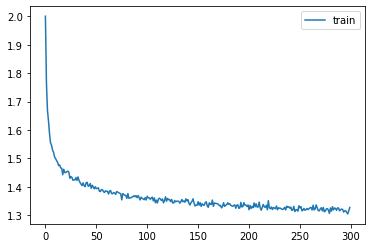

In [58]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 5
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.83333   0.22472   0.35398        89
          B2    0.00000   0.00000   0.00000       110
          B1    0.00000   0.00000   0.00000       140
          B0    0.83333   0.06369   0.11834       157
          S0    0.66667   0.07692   0.13793       156
          S1    0.00000   0.00000   0.00000       124
          S2    0.29412   0.08065   0.12658       124
          S3    0.94118   0.32000   0.47761       100

   micro avg    0.68852   0.08400   0.14973      1000
   macro avg    0.44608   0.09575   0.15181      1000
weighted avg    0.43959   0.08400   0.13506      1000
 samples avg    0.08400   0.08400   0.08400      1000

Confusion matrix, without normalization
[[ 89   0   0   0   0   0   0   0]
 [110   0   0   0   0   0   0   0]
 [139   0   0   1   0   0   0   0]
 [145   0   0  10   2   0   0   0]
 [142   0   0   1  12   0   1   0]
 [114   0

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


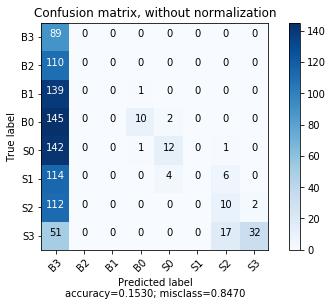

In [59]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 1s 127us/step - loss: 1.9372 - accuracy: 0.2187
Epoch 2/300
3997/3997 [==============================] - 0s 63us/step - loss: 1.6804 - accuracy: 0.3055
Epoch 3/300
3997/3997 [==============================] - 0s 55us/step - loss: 1.5830 - accuracy: 0.3513
Epoch 4/300
3997/3997 [==============================] - 0s 56us/step - loss: 1.5233 - accuracy: 0.3638
Epoch 5/300
3997/3997 [==============================] - 0s 51us/step - loss: 1.4890 - accuracy: 0.3875
Epoch 6/300
3997/3997 [==============================] - 0s 57us/step - loss: 1.4781 - accuracy: 0.3888
Epoch 7/300
3997/3997 [==============================] - 0s 53us/step - loss: 1.4536 - accuracy: 0.4036
Epoch 8/300
3997/3997 [==============================] - 0s 57us/step - loss: 1.4566 - accuracy: 0.3938
Epoch 9/300
3997/3997 [==============================] - 0s 61us/step - loss: 1.4249 - accuracy: 0.4116
Epoch 10/300
3997/3997 [==============================] - 0s 67

3997/3997 [==============================] - 0s 49us/step - loss: 1.2609 - accuracy: 0.4671
Epoch 80/300
3997/3997 [==============================] - 0s 53us/step - loss: 1.2587 - accuracy: 0.4734
Epoch 81/300
3997/3997 [==============================] - 0s 50us/step - loss: 1.2477 - accuracy: 0.4809
Epoch 82/300
3997/3997 [==============================] - 0s 50us/step - loss: 1.2531 - accuracy: 0.4761
Epoch 83/300
3997/3997 [==============================] - 0s 47us/step - loss: 1.2633 - accuracy: 0.4776
Epoch 84/300
3997/3997 [==============================] - 0s 46us/step - loss: 1.2513 - accuracy: 0.4706
Epoch 85/300
3997/3997 [==============================] - 0s 47us/step - loss: 1.2432 - accuracy: 0.4799
Epoch 86/300
3997/3997 [==============================] - 0s 46us/step - loss: 1.2510 - accuracy: 0.4789
Epoch 87/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2416 - accuracy: 0.4796
Epoch 88/300
3997/3997 [==============================] - 0s 54us/st

3997/3997 [==============================] - 0s 46us/step - loss: 1.2207 - accuracy: 0.4924
Epoch 157/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.2160 - accuracy: 0.5026
Epoch 158/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.2182 - accuracy: 0.4939
Epoch 159/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2186 - accuracy: 0.4969
Epoch 160/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2181 - accuracy: 0.4989
Epoch 161/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2120 - accuracy: 0.4964
Epoch 162/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2102 - accuracy: 0.4899
Epoch 163/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2257 - accuracy: 0.4869
Epoch 164/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.2075 - accuracy: 0.5046
Epoch 165/300
3997/3997 [==============================] - 0

3997/3997 [==============================] - 0s 45us/step - loss: 1.1822 - accuracy: 0.4996
Epoch 234/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.1837 - accuracy: 0.5016
Epoch 235/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.1906 - accuracy: 0.4979
Epoch 236/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.1949 - accuracy: 0.4961
Epoch 237/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.1995 - accuracy: 0.4951
Epoch 238/300
3997/3997 [==============================] - 0s 44us/step - loss: 1.1830 - accuracy: 0.5026
Epoch 239/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.1726 - accuracy: 0.5004
Epoch 240/300
3997/3997 [==============================] - 0s 45us/step - loss: 1.1937 - accuracy: 0.4969
Epoch 241/300
3997/3997 [==============================] - 0s 43us/step - loss: 1.1942 - accuracy: 0.4934
Epoch 242/300
3997/3997 [==============================] - 0

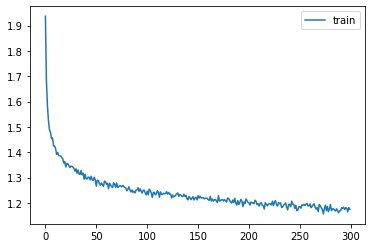

In [60]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 5
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.77778   0.47191   0.58741        89
          B2    0.40000   0.01818   0.03478       110
          B1    0.00000   0.00000   0.00000       140
          B0    0.64130   0.37580   0.47390       157
          S0    0.66667   0.39744   0.49799       156
          S1    0.00000   0.00000   0.00000       124
          S2    0.47826   0.26613   0.34197       124
          S3    0.81034   0.47000   0.59494       100

   micro avg    0.65333   0.24500   0.35636      1000
   macro avg    0.47179   0.24993   0.31637      1000
weighted avg    0.45825   0.24500   0.31009      1000
 samples avg    0.24500   0.24500   0.24500      1000

Confusion matrix, without normalization
[[ 85   2   0   2   0   0   0   0]
 [104   2   0   3   0   1   0   0]
 [120   1   0  17   1   1   0   0]
 [ 87   0   0  59  10   0   0   1]
 [ 83   0   0  10  62   0   1   0]
 [ 95   0

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


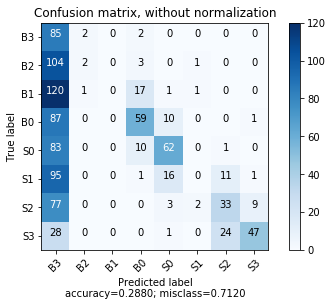

In [61]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 0s 88us/step - loss: 2.0252 - accuracy: 0.1918
Epoch 2/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.7698 - accuracy: 0.2745
Epoch 3/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.6469 - accuracy: 0.3228
Epoch 4/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.5798 - accuracy: 0.3398
Epoch 5/300
3993/3993 [==============================] - 0s 40us/step - loss: 1.5651 - accuracy: 0.3461
Epoch 6/300
3993/3993 [==============================] - 0s 38us/step - loss: 1.5428 - accuracy: 0.3596
Epoch 7/300
3993/3993 [==============================] - 0s 40us/step - loss: 1.5096 - accuracy: 0.3739
Epoch 8/300
3993/3993 [==============================] - 0s 38us/step - loss: 1.5078 - accuracy: 0.3814
Epoch 9/300
3993/3993 [==============================] - 0s 40us/step - loss: 1.5008 - accuracy: 0.3812
Epoch 10/300
3993/3993 [==============================] - 0s 41u

3993/3993 [==============================] - 0s 42us/step - loss: 1.2815 - accuracy: 0.4733
Epoch 80/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2927 - accuracy: 0.4666
Epoch 81/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2954 - accuracy: 0.4691
Epoch 82/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2846 - accuracy: 0.4711
Epoch 83/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2875 - accuracy: 0.4668
Epoch 84/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2898 - accuracy: 0.4653
Epoch 85/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2868 - accuracy: 0.4678
Epoch 86/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2861 - accuracy: 0.4646
Epoch 87/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2898 - accuracy: 0.4686
Epoch 88/300
3993/3993 [==============================] - 0s 41us/st

3993/3993 [==============================] - 0s 42us/step - loss: 1.2406 - accuracy: 0.4876
Epoch 157/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2476 - accuracy: 0.4773
Epoch 158/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2470 - accuracy: 0.4861
Epoch 159/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2538 - accuracy: 0.4871
Epoch 160/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2413 - accuracy: 0.4843
Epoch 161/300
3993/3993 [==============================] - 0s 42us/step - loss: 1.2537 - accuracy: 0.4831
Epoch 162/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2469 - accuracy: 0.4901
Epoch 163/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2507 - accuracy: 0.4696
Epoch 164/300
3993/3993 [==============================] - 0s 41us/step - loss: 1.2478 - accuracy: 0.4896
Epoch 165/300
3993/3993 [==============================] - 0

3993/3993 [==============================] - 0s 44us/step - loss: 1.2245 - accuracy: 0.4884
Epoch 234/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2147 - accuracy: 0.5004
Epoch 235/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2295 - accuracy: 0.4969
Epoch 236/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2183 - accuracy: 0.4949
Epoch 237/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2227 - accuracy: 0.4879
Epoch 238/300
3993/3993 [==============================] - 0s 43us/step - loss: 1.2158 - accuracy: 0.5024
Epoch 239/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2294 - accuracy: 0.4876
Epoch 240/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2107 - accuracy: 0.4974
Epoch 241/300
3993/3993 [==============================] - 0s 44us/step - loss: 1.2179 - accuracy: 0.4976
Epoch 242/300
3993/3993 [==============================] - 0

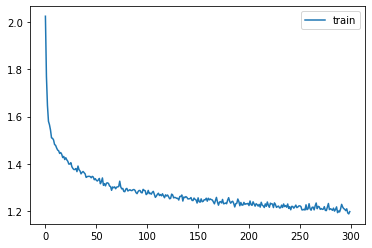

In [62]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 10
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.85294   0.32584   0.47154        89
          B2    0.33333   0.01818   0.03448       110
          B1    0.00000   0.00000   0.00000       135
          B0    0.62195   0.30539   0.40964       167
          S0    0.71429   0.28736   0.40984       174
          S1    0.33333   0.00787   0.01538       127
          S2    0.32000   0.06723   0.11111       119
          S3    0.84615   0.28205   0.42308        78

   micro avg    0.66260   0.16316   0.26185       999
   macro avg    0.50275   0.16174   0.23438       999
weighted avg    0.48763   0.16316   0.23389       999
 samples avg    0.16316   0.16316   0.16316       999

Confusion matrix, without normalization
[[ 88   1   0   0   0   0   0   0]
 [106   2   0   2   0   0   0   0]
 [121   2   0  12   0   0   0   0]
 [105   1   0  51   8   1   1   0]
 [107   0   0  15  50   1   1   0]
 [106   

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


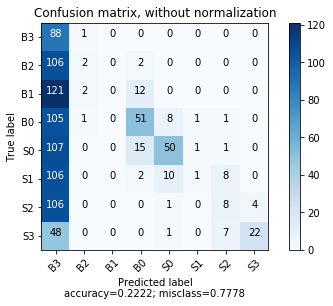

In [63]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 0s 89us/step - loss: 2.0412 - accuracy: 0.1741
Epoch 2/300
3993/3993 [==============================] - 0s 46us/step - loss: 1.7768 - accuracy: 0.2675
Epoch 3/300
3993/3993 [==============================] - 0s 45us/step - loss: 1.6270 - accuracy: 0.3273
Epoch 4/300
3993/3993 [==============================] - 0s 45us/step - loss: 1.5610 - accuracy: 0.3544
Epoch 5/300
3993/3993 [==============================] - 0s 45us/step - loss: 1.5201 - accuracy: 0.3769
Epoch 6/300
3993/3993 [==============================] - 0s 46us/step - loss: 1.4992 - accuracy: 0.3782
Epoch 7/300
3993/3993 [==============================] - 0s 46us/step - loss: 1.4817 - accuracy: 0.3772
Epoch 8/300
3993/3993 [==============================] - 0s 46us/step - loss: 1.4476 - accuracy: 0.3929
Epoch 9/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.4512 - accuracy: 0.4010
Epoch 10/300
3993/3993 [==============================] - 0s 48u

3993/3993 [==============================] - 0s 49us/step - loss: 1.2654 - accuracy: 0.4773
Epoch 80/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2527 - accuracy: 0.4821
Epoch 81/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.2471 - accuracy: 0.4803
Epoch 82/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2617 - accuracy: 0.4843
Epoch 83/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2623 - accuracy: 0.4686
Epoch 84/300
3993/3993 [==============================] - 0s 53us/step - loss: 1.2545 - accuracy: 0.4721
Epoch 85/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2492 - accuracy: 0.4753
Epoch 86/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2632 - accuracy: 0.4848
Epoch 87/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2568 - accuracy: 0.4748
Epoch 88/300
3993/3993 [==============================] - 0s 48us/st

3993/3993 [==============================] - 0s 49us/step - loss: 1.2164 - accuracy: 0.4944
Epoch 157/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2314 - accuracy: 0.4859
Epoch 158/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2153 - accuracy: 0.4959
Epoch 159/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.2239 - accuracy: 0.4949
Epoch 160/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2135 - accuracy: 0.4979
Epoch 161/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2212 - accuracy: 0.4931
Epoch 162/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2179 - accuracy: 0.4891
Epoch 163/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.2225 - accuracy: 0.4964
Epoch 164/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.2148 - accuracy: 0.4926
Epoch 165/300
3993/3993 [==============================] - 0

3993/3993 [==============================] - 0s 48us/step - loss: 1.2030 - accuracy: 0.4989
Epoch 234/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.1994 - accuracy: 0.4959
Epoch 235/300
3993/3993 [==============================] - 0s 50us/step - loss: 1.2043 - accuracy: 0.5064
Epoch 236/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.1907 - accuracy: 0.5056
Epoch 237/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.1863 - accuracy: 0.5051
Epoch 238/300
3993/3993 [==============================] - 0s 49us/step - loss: 1.1918 - accuracy: 0.4959
Epoch 239/300
3993/3993 [==============================] - 0s 46us/step - loss: 1.2026 - accuracy: 0.4884
Epoch 240/300
3993/3993 [==============================] - 0s 47us/step - loss: 1.2099 - accuracy: 0.4921
Epoch 241/300
3993/3993 [==============================] - 0s 48us/step - loss: 1.1930 - accuracy: 0.4996
Epoch 242/300
3993/3993 [==============================] - 0

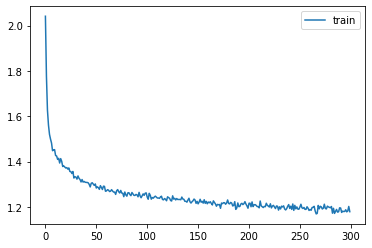

In [64]:
fit(m, c, s, i)

Model mlp
Number of classes 8
Number of steps 10
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.86667   0.43820   0.58209        89
          B2    0.25000   0.00909   0.01754       110
          B1    0.00000   0.00000   0.00000       135
          B0    0.51880   0.41317   0.46000       167
          S0    0.75410   0.26437   0.39149       174
          S1    0.00000   0.00000   0.00000       127
          S2    0.42857   0.20168   0.27429       119
          S3    0.81250   0.33333   0.47273        78

   micro avg    0.61934   0.20521   0.30827       999
   macro avg    0.45383   0.20748   0.27477       999
weighted avg    0.43730   0.20521   0.26846       999
 samples avg    0.20521   0.20521   0.20521       999

Confusion matrix, without normalization
[[ 86   3   0   0   0   0   0   0]
 [ 98   1   0  10   0   0   1   0]
 [103   0   0  30   1   0   1   0]
 [ 89   0   0  69   9   0   0   0]
 [106   0   0  20  46   0   2   0]
 [112   

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


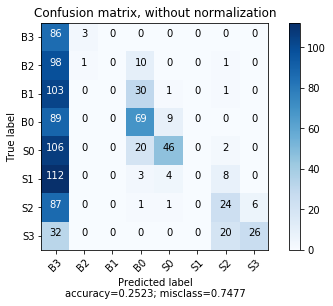

In [65]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 1s 285us/step - loss: 0.5250 - accuracy: 0.7577
Epoch 2/300
4000/4000 [==============================] - 0s 95us/step - loss: 0.3072 - accuracy: 0.8867
Epoch 3/300
4000/4000 [==============================] - 0s 93us/step - loss: 0.2871 - accuracy: 0.8910
Epoch 4/300
4000/4000 [==============================] - 0s 94us/step - loss: 0.2792 - accuracy: 0.8928
Epoch 5/300
4000/4000 [==============================] - 0s 95us/step - loss: 0.2745 - accuracy: 0.8938
Epoch 6/300
4000/4000 [==============================] - 0s 94us/step - loss: 0.2717 - accuracy: 0.8957
Epoch 7/300
4000/4000 [==============================] - 0s 93us/step - loss: 0.2736 - accuracy: 0.8985
Epoch 8/300
4000/4000 [==============================] - 0s 97us/step - loss: 0.2708 - accuracy: 0.8967
Epoch 9/300
4000/4000 [==============================] - 0s 99us/step - loss: 0.2699 - accuracy: 0.8947
Epoch 10/300
4000/4000 [==============================] - 0s 10

4000/4000 [==============================] - 0s 102us/step - loss: 0.2525 - accuracy: 0.9057
Epoch 79/300
4000/4000 [==============================] - 0s 102us/step - loss: 0.2500 - accuracy: 0.9045
Epoch 80/300
4000/4000 [==============================] - 0s 100us/step - loss: 0.2502 - accuracy: 0.9047
Epoch 81/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2505 - accuracy: 0.9032
Epoch 82/300
4000/4000 [==============================] - 0s 106us/step - loss: 0.2528 - accuracy: 0.9038
Epoch 83/300
4000/4000 [==============================] - 0s 106us/step - loss: 0.2513 - accuracy: 0.9028
Epoch 84/300
4000/4000 [==============================] - 0s 107us/step - loss: 0.2498 - accuracy: 0.9087
Epoch 85/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2492 - accuracy: 0.9072
Epoch 86/300
4000/4000 [==============================] - 0s 105us/step - loss: 0.2503 - accuracy: 0.9062
Epoch 87/300
4000/4000 [==============================] - 0

Epoch 155/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2365 - accuracy: 0.9097
Epoch 156/300
4000/4000 [==============================] - 0s 102us/step - loss: 0.2370 - accuracy: 0.9107
Epoch 157/300
4000/4000 [==============================] - 0s 111us/step - loss: 0.2358 - accuracy: 0.9075
Epoch 158/300
4000/4000 [==============================] - 0s 110us/step - loss: 0.2371 - accuracy: 0.9087
Epoch 159/300
4000/4000 [==============================] - 0s 106us/step - loss: 0.2361 - accuracy: 0.9093
Epoch 160/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2363 - accuracy: 0.9087
Epoch 161/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2362 - accuracy: 0.9068
Epoch 162/300
4000/4000 [==============================] - 0s 106us/step - loss: 0.2348 - accuracy: 0.9120
Epoch 163/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2341 - accuracy: 0.9075
Epoch 164/300
4000/4000 [============

4000/4000 [==============================] - 0s 103us/step - loss: 0.2234 - accuracy: 0.9135
Epoch 232/300
4000/4000 [==============================] - 0s 102us/step - loss: 0.2265 - accuracy: 0.9128
Epoch 233/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2229 - accuracy: 0.9075
Epoch 234/300
4000/4000 [==============================] - 0s 102us/step - loss: 0.2240 - accuracy: 0.9133
Epoch 235/300
4000/4000 [==============================] - 0s 100us/step - loss: 0.2219 - accuracy: 0.9120
Epoch 236/300
4000/4000 [==============================] - 0s 99us/step - loss: 0.2236 - accuracy: 0.9120
Epoch 237/300
4000/4000 [==============================] - 0s 99us/step - loss: 0.2205 - accuracy: 0.9105
Epoch 238/300
4000/4000 [==============================] - 0s 99us/step - loss: 0.2219 - accuracy: 0.9125
Epoch 239/300
4000/4000 [==============================] - 0s 99us/step - loss: 0.2222 - accuracy: 0.9105
Epoch 240/300
4000/4000 [==============================

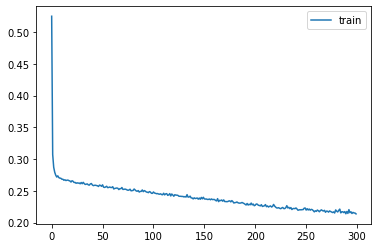

In [66]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 2
Number of indicators 3
              precision    recall  f1-score   support

           S    0.84013   0.91964   0.87809       560
           B    0.88372   0.77727   0.82709       440

    accuracy                        0.85700      1000
   macro avg    0.86193   0.84846   0.85259      1000
weighted avg    0.85931   0.85700   0.85565      1000

Confusion matrix, without normalization
[[515  45]
 [ 98 342]]


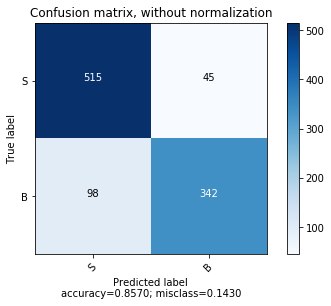

In [67]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 1s 286us/step - loss: 0.5416 - accuracy: 0.7135
Epoch 2/300
4000/4000 [==============================] - 0s 94us/step - loss: 0.3176 - accuracy: 0.8770
Epoch 3/300
4000/4000 [==============================] - 0s 96us/step - loss: 0.2829 - accuracy: 0.8895
Epoch 4/300
4000/4000 [==============================] - 0s 100us/step - loss: 0.2732 - accuracy: 0.8942
Epoch 5/300
4000/4000 [==============================] - 0s 97us/step - loss: 0.2706 - accuracy: 0.8932
Epoch 6/300
4000/4000 [==============================] - 0s 98us/step - loss: 0.2648 - accuracy: 0.8978
Epoch 7/300
4000/4000 [==============================] - 0s 101us/step - loss: 0.2643 - accuracy: 0.8975
Epoch 8/300
4000/4000 [==============================] - 0s 100us/step - loss: 0.2662 - accuracy: 0.8997
Epoch 9/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2609 - accuracy: 0.8985
Epoch 10/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 108us/step - loss: 0.2300 - accuracy: 0.9115
Epoch 79/300
4000/4000 [==============================] - 0s 107us/step - loss: 0.2326 - accuracy: 0.9093
Epoch 80/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2304 - accuracy: 0.9135
Epoch 81/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2350 - accuracy: 0.9062
Epoch 82/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2313 - accuracy: 0.9115
Epoch 83/300
4000/4000 [==============================] - 0s 109us/step - loss: 0.2302 - accuracy: 0.9130
Epoch 84/300
4000/4000 [==============================] - 0s 110us/step - loss: 0.2284 - accuracy: 0.9140
Epoch 85/300
4000/4000 [==============================] - 0s 107us/step - loss: 0.2311 - accuracy: 0.9120
Epoch 86/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2302 - accuracy: 0.9140
Epoch 87/300
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 104us/step - loss: 0.2129 - accuracy: 0.9175
Epoch 155/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2121 - accuracy: 0.9183
Epoch 156/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2150 - accuracy: 0.9147
Epoch 157/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2154 - accuracy: 0.9145
Epoch 158/300
4000/4000 [==============================] - 0s 110us/step - loss: 0.2147 - accuracy: 0.9145
Epoch 159/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2131 - accuracy: 0.9147
Epoch 160/300
4000/4000 [==============================] - 0s 108us/step - loss: 0.2129 - accuracy: 0.9158
Epoch 161/300
4000/4000 [==============================] - 0s 109us/step - loss: 0.2112 - accuracy: 0.9165
Epoch 162/300
4000/4000 [==============================] - 0s 107us/step - loss: 0.2110 - accuracy: 0.9180
Epoch 163/300
4000/4000 [==========================

4000/4000 [==============================] - 0s 108us/step - loss: 0.2038 - accuracy: 0.9187
Epoch 231/300
4000/4000 [==============================] - 0s 106us/step - loss: 0.2042 - accuracy: 0.9197
Epoch 232/300
4000/4000 [==============================] - 0s 104us/step - loss: 0.2028 - accuracy: 0.9200
Epoch 233/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2017 - accuracy: 0.9202
Epoch 234/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2027 - accuracy: 0.9190
Epoch 235/300
4000/4000 [==============================] - 0s 105us/step - loss: 0.2018 - accuracy: 0.9200
Epoch 236/300
4000/4000 [==============================] - 0s 102us/step - loss: 0.2020 - accuracy: 0.9178
Epoch 237/300
4000/4000 [==============================] - 0s 105us/step - loss: 0.2036 - accuracy: 0.9215
Epoch 238/300
4000/4000 [==============================] - 0s 103us/step - loss: 0.2009 - accuracy: 0.9212
Epoch 239/300
4000/4000 [==========================

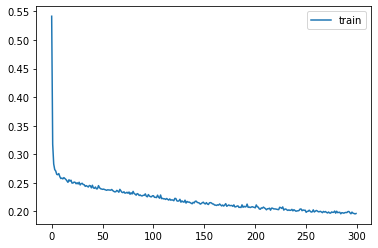

In [68]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 2
Number of indicators 6
              precision    recall  f1-score   support

           S    0.83153   0.96071   0.89147       560
           B    0.93768   0.75227   0.83480       440

    accuracy                        0.86900      1000
   macro avg    0.88460   0.85649   0.86314      1000
weighted avg    0.87823   0.86900   0.86654      1000

Confusion matrix, without normalization
[[538  22]
 [109 331]]


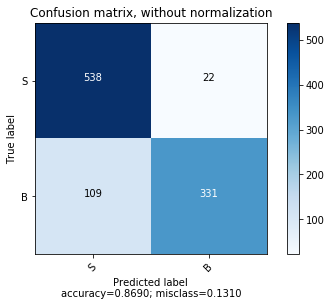

In [69]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 1s 355us/step - loss: 0.4947 - accuracy: 0.7503
Epoch 2/300
3997/3997 [==============================] - 1s 163us/step - loss: 0.3209 - accuracy: 0.8699
Epoch 3/300
3997/3997 [==============================] - 1s 162us/step - loss: 0.2918 - accuracy: 0.8862
Epoch 4/300
3997/3997 [==============================] - 1s 161us/step - loss: 0.2926 - accuracy: 0.8802
Epoch 5/300
3997/3997 [==============================] - 1s 167us/step - loss: 0.2823 - accuracy: 0.8834
Epoch 6/300
3997/3997 [==============================] - 1s 175us/step - loss: 0.2726 - accuracy: 0.8934
Epoch 7/300
3997/3997 [==============================] - 1s 185us/step - loss: 0.2733 - accuracy: 0.8919
Epoch 8/300
3997/3997 [==============================] - 1s 188us/step - loss: 0.2653 - accuracy: 0.8937
Epoch 9/300
3997/3997 [==============================] - 1s 195us/step - loss: 0.2652 - accuracy: 0.8979
Epoch 10/300
3997/3997 [==============================]

3997/3997 [==============================] - 1s 172us/step - loss: 0.2152 - accuracy: 0.9142
Epoch 79/300
3997/3997 [==============================] - 1s 177us/step - loss: 0.2136 - accuracy: 0.9149
Epoch 80/300
3997/3997 [==============================] - 1s 172us/step - loss: 0.2167 - accuracy: 0.9152
Epoch 81/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.2191 - accuracy: 0.9104
Epoch 82/300
3997/3997 [==============================] - 1s 174us/step - loss: 0.2133 - accuracy: 0.9154
Epoch 83/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.2109 - accuracy: 0.9144
Epoch 84/300
3997/3997 [==============================] - 1s 174us/step - loss: 0.2127 - accuracy: 0.9137
Epoch 85/300
3997/3997 [==============================] - 1s 171us/step - loss: 0.2120 - accuracy: 0.9132
Epoch 86/300
3997/3997 [==============================] - 1s 174us/step - loss: 0.2121 - accuracy: 0.9137
Epoch 87/300
3997/3997 [==============================] - 1

3997/3997 [==============================] - 1s 179us/step - loss: 0.1853 - accuracy: 0.9232
Epoch 155/300
3997/3997 [==============================] - 1s 176us/step - loss: 0.1831 - accuracy: 0.9237
Epoch 156/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1877 - accuracy: 0.9192
Epoch 157/300
3997/3997 [==============================] - 1s 174us/step - loss: 0.1850 - accuracy: 0.9227
Epoch 158/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1843 - accuracy: 0.9197
Epoch 159/300
3997/3997 [==============================] - 1s 172us/step - loss: 0.1829 - accuracy: 0.9222
Epoch 160/300
3997/3997 [==============================] - 1s 172us/step - loss: 0.1843 - accuracy: 0.9247
Epoch 161/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1835 - accuracy: 0.9242
Epoch 162/300
3997/3997 [==============================] - 1s 175us/step - loss: 0.1857 - accuracy: 0.9257
Epoch 163/300
3997/3997 [==========================

3997/3997 [==============================] - 1s 173us/step - loss: 0.1557 - accuracy: 0.9317
Epoch 231/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1510 - accuracy: 0.9362
Epoch 232/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1554 - accuracy: 0.9345
Epoch 233/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1526 - accuracy: 0.9322
Epoch 234/300
3997/3997 [==============================] - 1s 174us/step - loss: 0.1524 - accuracy: 0.9362
Epoch 235/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1500 - accuracy: 0.9340
Epoch 236/300
3997/3997 [==============================] - 1s 173us/step - loss: 0.1513 - accuracy: 0.9350
Epoch 237/300
3997/3997 [==============================] - 1s 183us/step - loss: 0.1518 - accuracy: 0.9340
Epoch 238/300
3997/3997 [==============================] - 1s 178us/step - loss: 0.1634 - accuracy: 0.9327
Epoch 239/300
3997/3997 [==========================

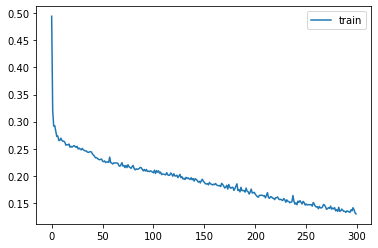

In [70]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 5
Number of indicators 3
              precision    recall  f1-score   support

           S    0.93404   0.78393   0.85243       560
           B    0.77170   0.92955   0.84330       440

    accuracy                        0.84800      1000
   macro avg    0.85287   0.85674   0.84786      1000
weighted avg    0.86261   0.84800   0.84841      1000

Confusion matrix, without normalization
[[439 121]
 [ 31 409]]


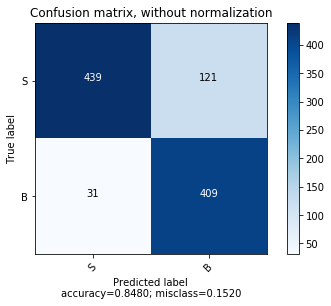

In [71]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 1s 356us/step - loss: 0.4655 - accuracy: 0.7796
Epoch 2/300
3997/3997 [==============================] - 1s 172us/step - loss: 0.3156 - accuracy: 0.8692
Epoch 3/300
3997/3997 [==============================] - 1s 171us/step - loss: 0.2853 - accuracy: 0.8814
Epoch 4/300
3997/3997 [==============================] - 1s 172us/step - loss: 0.2818 - accuracy: 0.8889
Epoch 5/300
3997/3997 [==============================] - 1s 182us/step - loss: 0.2679 - accuracy: 0.8954
Epoch 6/300
3997/3997 [==============================] - 1s 195us/step - loss: 0.2625 - accuracy: 0.9024
Epoch 7/300
3997/3997 [==============================] - 1s 202us/step - loss: 0.2667 - accuracy: 0.8912
Epoch 8/300
3997/3997 [==============================] - 1s 209us/step - loss: 0.2607 - accuracy: 0.8919
Epoch 9/300
3997/3997 [==============================] - 1s 211us/step - loss: 0.2550 - accuracy: 0.9007
Epoch 10/300
3997/3997 [==============================]

3997/3997 [==============================] - 1s 191us/step - loss: 0.1818 - accuracy: 0.9299
Epoch 79/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.1800 - accuracy: 0.9249
Epoch 80/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.1782 - accuracy: 0.9317
Epoch 81/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.1782 - accuracy: 0.9292
Epoch 82/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.1788 - accuracy: 0.9317
Epoch 83/300
3997/3997 [==============================] - 1s 200us/step - loss: 0.1763 - accuracy: 0.9319
Epoch 84/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.1781 - accuracy: 0.9314
Epoch 85/300
3997/3997 [==============================] - 1s 199us/step - loss: 0.1728 - accuracy: 0.9287
Epoch 86/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.1732 - accuracy: 0.9332
Epoch 87/300
3997/3997 [==============================] - 1

3997/3997 [==============================] - 1s 195us/step - loss: 0.1021 - accuracy: 0.9600
Epoch 155/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.1012 - accuracy: 0.9587
Epoch 156/300
3997/3997 [==============================] - 1s 200us/step - loss: 0.0947 - accuracy: 0.9607
Epoch 157/300
3997/3997 [==============================] - 1s 195us/step - loss: 0.1039 - accuracy: 0.9592
Epoch 158/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.0921 - accuracy: 0.9657
Epoch 159/300
3997/3997 [==============================] - 1s 192us/step - loss: 0.0962 - accuracy: 0.9620
Epoch 160/300
3997/3997 [==============================] - 1s 198us/step - loss: 0.0962 - accuracy: 0.9635
Epoch 161/300
3997/3997 [==============================] - 1s 197us/step - loss: 0.0909 - accuracy: 0.9632
Epoch 162/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.0892 - accuracy: 0.9637
Epoch 163/300
3997/3997 [==========================

3997/3997 [==============================] - 1s 194us/step - loss: 0.0227 - accuracy: 0.9940
Epoch 231/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.0246 - accuracy: 0.9922
Epoch 232/300
3997/3997 [==============================] - 1s 205us/step - loss: 0.0574 - accuracy: 0.9795
Epoch 233/300
3997/3997 [==============================] - 1s 200us/step - loss: 0.0532 - accuracy: 0.9785
Epoch 234/300
3997/3997 [==============================] - 1s 198us/step - loss: 0.0435 - accuracy: 0.9845
Epoch 235/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.0324 - accuracy: 0.9887
Epoch 236/300
3997/3997 [==============================] - 1s 203us/step - loss: 0.0260 - accuracy: 0.9912
Epoch 237/300
3997/3997 [==============================] - 1s 197us/step - loss: 0.0180 - accuracy: 0.9947
Epoch 238/300
3997/3997 [==============================] - 1s 199us/step - loss: 0.0191 - accuracy: 0.9935
Epoch 239/300
3997/3997 [==========================

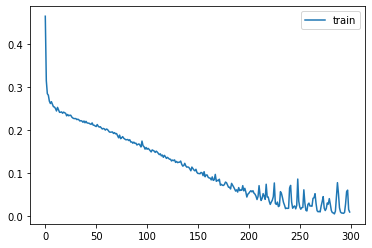

In [72]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 5
Number of indicators 6
              precision    recall  f1-score   support

           S    0.79653   0.90179   0.84590       560
           B    0.84973   0.70682   0.77171       440

    accuracy                        0.81600      1000
   macro avg    0.82313   0.80430   0.80880      1000
weighted avg    0.81994   0.81600   0.81326      1000

Confusion matrix, without normalization
[[505  55]
 [129 311]]


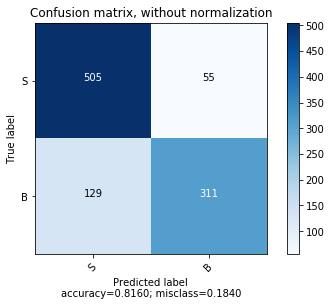

In [73]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 2s 471us/step - loss: 0.5128 - accuracy: 0.7375
Epoch 2/300
3993/3993 [==============================] - 1s 279us/step - loss: 0.3122 - accuracy: 0.8725
Epoch 3/300
3993/3993 [==============================] - 1s 281us/step - loss: 0.2840 - accuracy: 0.8878
Epoch 4/300
3993/3993 [==============================] - 1s 315us/step - loss: 0.2816 - accuracy: 0.8876
Epoch 5/300
3993/3993 [==============================] - 1s 339us/step - loss: 0.2756 - accuracy: 0.8938
Epoch 6/300
3993/3993 [==============================] - 1s 336us/step - loss: 0.2693 - accuracy: 0.8946
Epoch 7/300
3993/3993 [==============================] - 1s 336us/step - loss: 0.2645 - accuracy: 0.9003
Epoch 8/300
3993/3993 [==============================] - 1s 329us/step - loss: 0.2660 - accuracy: 0.8938
Epoch 9/300
3993/3993 [==============================] - 1s 323us/step - loss: 0.2664 - accuracy: 0.8943
Epoch 10/300
3993/3993 [==============================]

3993/3993 [==============================] - 1s 330us/step - loss: 0.1616 - accuracy: 0.9386
Epoch 79/300
3993/3993 [==============================] - 1s 318us/step - loss: 0.1494 - accuracy: 0.9457
Epoch 80/300
3993/3993 [==============================] - 1s 320us/step - loss: 0.1436 - accuracy: 0.9429
Epoch 81/300
3993/3993 [==============================] - 1s 324us/step - loss: 0.1483 - accuracy: 0.9447
Epoch 82/300
3993/3993 [==============================] - 1s 334us/step - loss: 0.1421 - accuracy: 0.9439
Epoch 83/300
3993/3993 [==============================] - 1s 323us/step - loss: 0.1520 - accuracy: 0.9426
Epoch 84/300
3993/3993 [==============================] - 1s 308us/step - loss: 0.1378 - accuracy: 0.9479
Epoch 85/300
3993/3993 [==============================] - 1s 323us/step - loss: 0.1281 - accuracy: 0.9544
Epoch 86/300
3993/3993 [==============================] - 1s 322us/step - loss: 0.1321 - accuracy: 0.9527
Epoch 87/300
3993/3993 [==============================] - 1

3993/3993 [==============================] - 1s 305us/step - loss: 0.0601 - accuracy: 0.9810
Epoch 155/300
3993/3993 [==============================] - 1s 321us/step - loss: 0.0429 - accuracy: 0.9852
Epoch 156/300
3993/3993 [==============================] - 1s 325us/step - loss: 0.0349 - accuracy: 0.9895
Epoch 157/300
3993/3993 [==============================] - 1s 311us/step - loss: 0.0704 - accuracy: 0.9762
Epoch 158/300
3993/3993 [==============================] - 1s 308us/step - loss: 0.0561 - accuracy: 0.9802
Epoch 159/300
3993/3993 [==============================] - 1s 309us/step - loss: 0.0447 - accuracy: 0.9842
Epoch 160/300
3993/3993 [==============================] - 1s 313us/step - loss: 0.0342 - accuracy: 0.9912
Epoch 161/300
3993/3993 [==============================] - 1s 322us/step - loss: 0.0347 - accuracy: 0.9907
Epoch 162/300
3993/3993 [==============================] - 1s 312us/step - loss: 0.0373 - accuracy: 0.9907
Epoch 163/300
3993/3993 [==========================

3993/3993 [==============================] - 1s 309us/step - loss: 0.0242 - accuracy: 0.9922
Epoch 231/300
3993/3993 [==============================] - 1s 306us/step - loss: 0.0123 - accuracy: 0.9980
Epoch 232/300
3993/3993 [==============================] - 1s 308us/step - loss: 0.0142 - accuracy: 0.9960
Epoch 233/300
3993/3993 [==============================] - 1s 305us/step - loss: 0.0275 - accuracy: 0.9917
Epoch 234/300
3993/3993 [==============================] - 1s 317us/step - loss: 0.0288 - accuracy: 0.9905
Epoch 235/300
3993/3993 [==============================] - 1s 313us/step - loss: 0.0120 - accuracy: 0.9975
Epoch 236/300
3993/3993 [==============================] - 1s 306us/step - loss: 0.0076 - accuracy: 0.9987
Epoch 237/300
3993/3993 [==============================] - 1s 307us/step - loss: 0.0050 - accuracy: 0.9995
Epoch 238/300
3993/3993 [==============================] - 1s 315us/step - loss: 0.0086 - accuracy: 0.9972
Epoch 239/300
3993/3993 [==========================

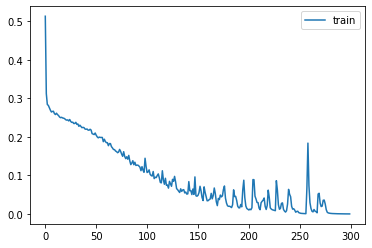

In [74]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 10
Number of indicators 3
              precision    recall  f1-score   support

           S    0.79595   0.84286   0.81873       560
           B    0.78325   0.72437   0.75266       439

    accuracy                        0.79079       999
   macro avg    0.78960   0.78362   0.78570       999
weighted avg    0.79037   0.79079   0.78970       999

Confusion matrix, without normalization
[[472  88]
 [121 318]]


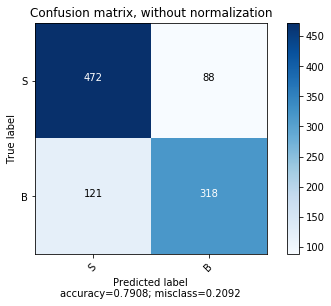

In [75]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 2s 544us/step - loss: 0.4730 - accuracy: 0.7703
Epoch 2/300
3993/3993 [==============================] - 1s 372us/step - loss: 0.3100 - accuracy: 0.8713
Epoch 3/300
3993/3993 [==============================] - 2s 423us/step - loss: 0.2861 - accuracy: 0.8848
Epoch 4/300
3993/3993 [==============================] - 2s 445us/step - loss: 0.2768 - accuracy: 0.8941
Epoch 5/300
3993/3993 [==============================] - 2s 443us/step - loss: 0.2718 - accuracy: 0.8918
Epoch 6/300
3993/3993 [==============================] - 2s 464us/step - loss: 0.2697 - accuracy: 0.8906
Epoch 7/300
3993/3993 [==============================] - 2s 441us/step - loss: 0.2584 - accuracy: 0.8986
Epoch 8/300
3993/3993 [==============================] - 2s 437us/step - loss: 0.2574 - accuracy: 0.8951
Epoch 9/300
3993/3993 [==============================] - 2s 454us/step - loss: 0.2562 - accuracy: 0.8996
Epoch 10/300
3993/3993 [==============================]

3993/3993 [==============================] - 2s 447us/step - loss: 0.0745 - accuracy: 0.9747
Epoch 79/300
3993/3993 [==============================] - 2s 442us/step - loss: 0.0747 - accuracy: 0.9760
Epoch 80/300
3993/3993 [==============================] - 2s 435us/step - loss: 0.0642 - accuracy: 0.9795
Epoch 81/300
3993/3993 [==============================] - 2s 464us/step - loss: 0.0611 - accuracy: 0.9795
Epoch 82/300
3993/3993 [==============================] - 2s 449us/step - loss: 0.0583 - accuracy: 0.9827
Epoch 83/300
3993/3993 [==============================] - 2s 449us/step - loss: 0.0598 - accuracy: 0.9790
Epoch 84/300
3993/3993 [==============================] - 2s 448us/step - loss: 0.0621 - accuracy: 0.9812
Epoch 85/300
3993/3993 [==============================] - 2s 436us/step - loss: 0.0549 - accuracy: 0.9825
Epoch 86/300
3993/3993 [==============================] - 2s 436us/step - loss: 0.0533 - accuracy: 0.9827
Epoch 87/300
3993/3993 [==============================] - 2

3993/3993 [==============================] - 2s 449us/step - loss: 1.6868e-04 - accuracy: 1.0000
Epoch 155/300
3993/3993 [==============================] - 2s 428us/step - loss: 1.5144e-04 - accuracy: 1.0000
Epoch 156/300
3993/3993 [==============================] - 2s 445us/step - loss: 1.3489e-04 - accuracy: 1.0000
Epoch 157/300
3993/3993 [==============================] - 2s 448us/step - loss: 1.1943e-04 - accuracy: 1.0000
Epoch 158/300
3993/3993 [==============================] - 2s 441us/step - loss: 1.0597e-04 - accuracy: 1.0000
Epoch 159/300
3993/3993 [==============================] - 2s 443us/step - loss: 9.9446e-05 - accuracy: 1.0000
Epoch 160/300
3993/3993 [==============================] - 2s 436us/step - loss: 8.7151e-05 - accuracy: 1.0000
Epoch 161/300
3993/3993 [==============================] - 2s 429us/step - loss: 7.7662e-05 - accuracy: 1.0000
Epoch 162/300
3993/3993 [==============================] - 2s 451us/step - loss: 7.0822e-05 - accuracy: 1.0000
Epoch 163/300
3

3993/3993 [==============================] - 2s 443us/step - loss: 5.0321e-06 - accuracy: 1.0000
Epoch 229/300
3993/3993 [==============================] - 2s 447us/step - loss: 4.6889e-06 - accuracy: 1.0000
Epoch 230/300
3993/3993 [==============================] - 2s 439us/step - loss: 4.2938e-06 - accuracy: 1.0000
Epoch 231/300
3993/3993 [==============================] - 2s 437us/step - loss: 3.9530e-06 - accuracy: 1.0000
Epoch 232/300
3993/3993 [==============================] - 2s 452us/step - loss: 3.6728e-06 - accuracy: 1.0000
Epoch 233/300
3993/3993 [==============================] - 2s 440us/step - loss: 0.1453 - accuracy: 0.9479
Epoch 234/300
3993/3993 [==============================] - 2s 438us/step - loss: 0.1641 - accuracy: 0.9391
Epoch 235/300
3993/3993 [==============================] - 2s 447us/step - loss: 0.0890 - accuracy: 0.9674
Epoch 236/300
3993/3993 [==============================] - 2s 443us/step - loss: 0.0572 - accuracy: 0.9802
Epoch 237/300
3993/3993 [======

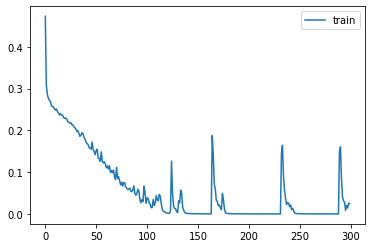

In [76]:
fit(m, c, s, i)

Model lstm
Number of classes 2
Number of steps 10
Number of indicators 6
              precision    recall  f1-score   support

           S    0.70871   0.84286   0.76998       560
           B    0.73574   0.55809   0.63472       439

    accuracy                        0.71772       999
   macro avg    0.72222   0.70047   0.70235       999
weighted avg    0.72059   0.71772   0.71054       999

Confusion matrix, without normalization
[[472  88]
 [194 245]]


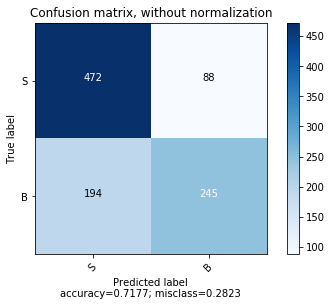

In [77]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 1s 267us/step - loss: 1.9982 - accuracy: 0.1910
Epoch 2/300
4000/4000 [==============================] - 0s 88us/step - loss: 1.6462 - accuracy: 0.3613
Epoch 3/300
4000/4000 [==============================] - 0s 88us/step - loss: 1.4962 - accuracy: 0.3857
Epoch 4/300
4000/4000 [==============================] - 0s 87us/step - loss: 1.4455 - accuracy: 0.4160
Epoch 5/300
4000/4000 [==============================] - 0s 87us/step - loss: 1.4231 - accuracy: 0.4245
Epoch 6/300
4000/4000 [==============================] - 0s 87us/step - loss: 1.4018 - accuracy: 0.4293
Epoch 7/300
4000/4000 [==============================] - 0s 86us/step - loss: 1.3926 - accuracy: 0.4320
Epoch 8/300
4000/4000 [==============================] - 0s 86us/step - loss: 1.3880 - accuracy: 0.4308
Epoch 9/300
4000/4000 [==============================] - 0s 86us/step - loss: 1.3786 - accuracy: 0.4363
Epoch 10/300
4000/4000 [==============================] - 0s 87

4000/4000 [==============================] - 0s 98us/step - loss: 1.3130 - accuracy: 0.4647
Epoch 80/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.3134 - accuracy: 0.4660
Epoch 81/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.3165 - accuracy: 0.4615
Epoch 82/300
4000/4000 [==============================] - 0s 102us/step - loss: 1.3132 - accuracy: 0.4660
Epoch 83/300
4000/4000 [==============================] - 0s 105us/step - loss: 1.3108 - accuracy: 0.4572
Epoch 84/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.3089 - accuracy: 0.4652
Epoch 85/300
4000/4000 [==============================] - 0s 102us/step - loss: 1.3103 - accuracy: 0.4613
Epoch 86/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.3105 - accuracy: 0.4588
Epoch 87/300
4000/4000 [==============================] - 0s 104us/step - loss: 1.3103 - accuracy: 0.4667
Epoch 88/300
4000/4000 [==============================] - 0s 1

4000/4000 [==============================] - 0s 99us/step - loss: 1.2775 - accuracy: 0.4837
Epoch 157/300
4000/4000 [==============================] - 0s 103us/step - loss: 1.2770 - accuracy: 0.4740
Epoch 158/300
4000/4000 [==============================] - 0s 101us/step - loss: 1.2739 - accuracy: 0.4825
Epoch 159/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.2748 - accuracy: 0.4795
Epoch 160/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.2744 - accuracy: 0.4848
Epoch 161/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.2758 - accuracy: 0.4832
Epoch 162/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.2728 - accuracy: 0.4882
Epoch 163/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.2713 - accuracy: 0.4918
Epoch 164/300
4000/4000 [==============================] - 0s 103us/step - loss: 1.2732 - accuracy: 0.4782
Epoch 165/300
4000/4000 [==============================]

4000/4000 [==============================] - 0s 99us/step - loss: 1.2260 - accuracy: 0.5025
Epoch 234/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.2262 - accuracy: 0.5067
Epoch 235/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.2272 - accuracy: 0.5015
Epoch 236/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.2289 - accuracy: 0.5023
Epoch 237/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.2263 - accuracy: 0.5023
Epoch 238/300
4000/4000 [==============================] - 0s 101us/step - loss: 1.2258 - accuracy: 0.5080
Epoch 239/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.2225 - accuracy: 0.5100
Epoch 240/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.2228 - accuracy: 0.5027
Epoch 241/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.2229 - accuracy: 0.4995
Epoch 242/300
4000/4000 [==============================] - 

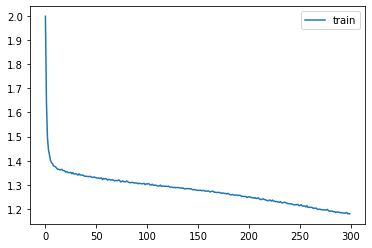

In [78]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 2
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.00000   0.00000   0.00000        60
          B2    0.33333   0.03297   0.06000        91
          B1    1.00000   0.00980   0.01942       102
          B0    0.00000   0.00000   0.00000       187
          S0    0.61905   0.06468   0.11712       201
          S1    0.00000   0.00000   0.00000       147
          S2    0.64286   0.05882   0.10778       153
          S3    1.00000   0.01695   0.03333        59

   micro avg    0.58696   0.02700   0.05163      1000
   macro avg    0.44940   0.02290   0.04221      1000
weighted avg    0.41412   0.02700   0.04944      1000
 samples avg    0.02700   0.02700   0.02700      1000

Confusion matrix, without normalization
[[ 55   5   0   0   0   0   0   0]
 [ 88   3   0   0   0   0   0   0]
 [101   0   1   0   0   0   0   0]
 [185   1   0   0   1   0   0   0]
 [188   0   0   0  13   0   0   0]
 [140   

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


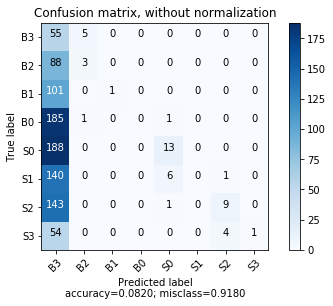

In [79]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
4000/4000 [==============================] - 1s 275us/step - loss: 1.9698 - accuracy: 0.2122
Epoch 2/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.5440 - accuracy: 0.3722
Epoch 3/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.4158 - accuracy: 0.4198
Epoch 4/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.3812 - accuracy: 0.4302
Epoch 5/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.3643 - accuracy: 0.4403
Epoch 6/300
4000/4000 [==============================] - 0s 94us/step - loss: 1.3515 - accuracy: 0.4467
Epoch 7/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.3474 - accuracy: 0.4405
Epoch 8/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.3384 - accuracy: 0.4555
Epoch 9/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.3312 - accuracy: 0.4595
Epoch 10/300
4000/4000 [==============================] - 0s 94

4000/4000 [==============================] - 0s 103us/step - loss: 1.2317 - accuracy: 0.4988
Epoch 79/300
4000/4000 [==============================] - 0s 103us/step - loss: 1.2304 - accuracy: 0.5000
Epoch 80/300
4000/4000 [==============================] - 0s 101us/step - loss: 1.2334 - accuracy: 0.4975
Epoch 81/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.2339 - accuracy: 0.4900
Epoch 82/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.2270 - accuracy: 0.4995
Epoch 83/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.2298 - accuracy: 0.5017
Epoch 84/300
4000/4000 [==============================] - 0s 102us/step - loss: 1.2272 - accuracy: 0.5020
Epoch 85/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.2244 - accuracy: 0.5013
Epoch 86/300
4000/4000 [==============================] - 0s 100us/step - loss: 1.2218 - accuracy: 0.5015
Epoch 87/300
4000/4000 [==============================] - 0s 

4000/4000 [==============================] - 0s 103us/step - loss: 1.1588 - accuracy: 0.5337
Epoch 156/300
4000/4000 [==============================] - 0s 101us/step - loss: 1.1631 - accuracy: 0.5328
Epoch 157/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.1558 - accuracy: 0.5445
Epoch 158/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.1592 - accuracy: 0.5368
Epoch 159/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.1570 - accuracy: 0.5415
Epoch 160/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.1613 - accuracy: 0.5335
Epoch 161/300
4000/4000 [==============================] - 0s 98us/step - loss: 1.1519 - accuracy: 0.5410
Epoch 162/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.1574 - accuracy: 0.5365
Epoch 163/300
4000/4000 [==============================] - 0s 99us/step - loss: 1.1560 - accuracy: 0.5390
Epoch 164/300
4000/4000 [==============================] -

4000/4000 [==============================] - 0s 96us/step - loss: 1.1020 - accuracy: 0.5625
Epoch 233/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.1024 - accuracy: 0.5552
Epoch 234/300
4000/4000 [==============================] - 0s 97us/step - loss: 1.1030 - accuracy: 0.5612
Epoch 235/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.1009 - accuracy: 0.5527
Epoch 236/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.1013 - accuracy: 0.5543
Epoch 237/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.0981 - accuracy: 0.5515
Epoch 238/300
4000/4000 [==============================] - 0s 96us/step - loss: 1.0978 - accuracy: 0.5515
Epoch 239/300
4000/4000 [==============================] - 0s 95us/step - loss: 1.1006 - accuracy: 0.5590
Epoch 240/300
4000/4000 [==============================] - 0s 95us/step - loss: 1.0981 - accuracy: 0.5610
Epoch 241/300
4000/4000 [==============================] - 0

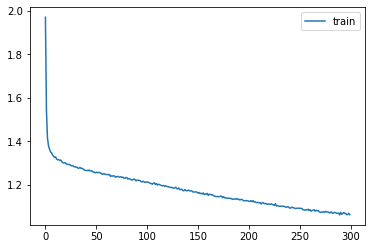

In [80]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 2
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.71429   0.08333   0.14925        60
          B2    0.58824   0.10989   0.18519        91
          B1    0.00000   0.00000   0.00000       102
          B0    0.34783   0.04278   0.07619       187
          S0    0.70588   0.05970   0.11009       201
          S1    0.00000   0.00000   0.00000       147
          S2    0.46154   0.07843   0.13408       153
          S3    0.61111   0.37288   0.46316        59

   micro avg    0.54762   0.06900   0.12256      1000
   macro avg    0.42861   0.09338   0.13974      1000
weighted avg    0.40998   0.06900   0.11002      1000
 samples avg    0.06900   0.06900   0.06900      1000

Confusion matrix, without normalization
[[ 53   3   0   4   0   0   0   0]
 [ 77  10   0   4   0   0   0   0]
 [ 93   3   0   6   0   0   0   0]
 [177   1   0   8   1   0   0   0]
 [188   0   0   1  12   0   0   0]
 [138   

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


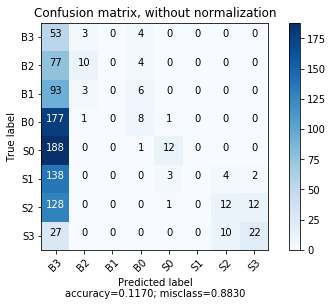

In [81]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 1s 339us/step - loss: 2.0127 - accuracy: 0.1896
Epoch 2/300
3997/3997 [==============================] - 1s 163us/step - loss: 1.6598 - accuracy: 0.3315
Epoch 3/300
3997/3997 [==============================] - 1s 161us/step - loss: 1.4750 - accuracy: 0.3835
Epoch 4/300
3997/3997 [==============================] - 1s 153us/step - loss: 1.4224 - accuracy: 0.4021
Epoch 5/300
3997/3997 [==============================] - 1s 155us/step - loss: 1.3928 - accuracy: 0.4248
Epoch 6/300
3997/3997 [==============================] - 1s 155us/step - loss: 1.3861 - accuracy: 0.4253
Epoch 7/300
3997/3997 [==============================] - 1s 155us/step - loss: 1.3676 - accuracy: 0.4271
Epoch 8/300
3997/3997 [==============================] - 1s 154us/step - loss: 1.3617 - accuracy: 0.4436
Epoch 9/300
3997/3997 [==============================] - 1s 164us/step - loss: 1.3586 - accuracy: 0.4438
Epoch 10/300
3997/3997 [==============================]

3997/3997 [==============================] - 1s 171us/step - loss: 1.1733 - accuracy: 0.5264
Epoch 79/300
3997/3997 [==============================] - 1s 169us/step - loss: 1.1706 - accuracy: 0.5266
Epoch 80/300
3997/3997 [==============================] - 1s 169us/step - loss: 1.1689 - accuracy: 0.5284
Epoch 81/300
3997/3997 [==============================] - 1s 172us/step - loss: 1.1695 - accuracy: 0.5294
Epoch 82/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.1640 - accuracy: 0.5364
Epoch 83/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.1634 - accuracy: 0.5331
Epoch 84/300
3997/3997 [==============================] - 1s 169us/step - loss: 1.1651 - accuracy: 0.5229
Epoch 85/300
3997/3997 [==============================] - 1s 171us/step - loss: 1.1620 - accuracy: 0.5357
Epoch 86/300
3997/3997 [==============================] - 1s 171us/step - loss: 1.1648 - accuracy: 0.5337
Epoch 87/300
3997/3997 [==============================] - 1

3997/3997 [==============================] - 1s 172us/step - loss: 1.0838 - accuracy: 0.5627
Epoch 155/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.0823 - accuracy: 0.5632
Epoch 156/300
3997/3997 [==============================] - 1s 169us/step - loss: 1.0773 - accuracy: 0.5634
Epoch 157/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.0692 - accuracy: 0.5649
Epoch 158/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.0741 - accuracy: 0.5664
Epoch 159/300
3997/3997 [==============================] - 1s 169us/step - loss: 1.0744 - accuracy: 0.5609
Epoch 160/300
3997/3997 [==============================] - 1s 164us/step - loss: 1.0823 - accuracy: 0.5614
Epoch 161/300
3997/3997 [==============================] - 1s 163us/step - loss: 1.0717 - accuracy: 0.5599
Epoch 162/300
3997/3997 [==============================] - 1s 167us/step - loss: 1.0700 - accuracy: 0.5709
Epoch 163/300
3997/3997 [==========================

3997/3997 [==============================] - 1s 170us/step - loss: 1.0020 - accuracy: 0.5884
Epoch 231/300
3997/3997 [==============================] - 1s 170us/step - loss: 0.9994 - accuracy: 0.5912
Epoch 232/300
3997/3997 [==============================] - 1s 168us/step - loss: 1.0028 - accuracy: 0.5929
Epoch 233/300
3997/3997 [==============================] - 1s 163us/step - loss: 0.9989 - accuracy: 0.5922
Epoch 234/300
3997/3997 [==============================] - 1s 163us/step - loss: 1.0013 - accuracy: 0.5934
Epoch 235/300
3997/3997 [==============================] - 1s 165us/step - loss: 0.9976 - accuracy: 0.5924
Epoch 236/300
3997/3997 [==============================] - 1s 167us/step - loss: 0.9950 - accuracy: 0.5987
Epoch 237/300
3997/3997 [==============================] - 1s 169us/step - loss: 0.9909 - accuracy: 0.5934
Epoch 238/300
3997/3997 [==============================] - 1s 169us/step - loss: 0.9954 - accuracy: 0.5967
Epoch 239/300
3997/3997 [==========================

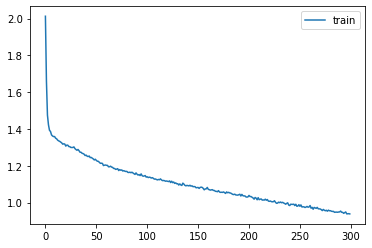

In [82]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 5
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.50000   0.16667   0.25000        60
          B2    0.60870   0.15385   0.24561        91
          B1    0.26000   0.38235   0.30952       102
          B0    0.37931   0.05882   0.10185       187
          S0    0.45192   0.46766   0.45966       201
          S1    0.50000   0.02041   0.03922       147
          S2    0.58904   0.28105   0.38053       153
          S3    0.25000   0.20339   0.22430        59

   micro avg    0.40575   0.22600   0.29030      1000
   macro avg    0.44237   0.21677   0.25134      1000
weighted avg    0.45205   0.22600   0.25758      1000
 samples avg    0.22600   0.22600   0.22600      1000

Confusion matrix, without normalization
[[ 25   7  27   1   0   0   0   0]
 [ 22  14  51   1   1   0   0   2]
 [ 46   2  39   9   3   0   0   3]
 [113   0  28  11  25   0   0  10]
 [ 89   0   5   5  94   0   1   7]
 [ 76   

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


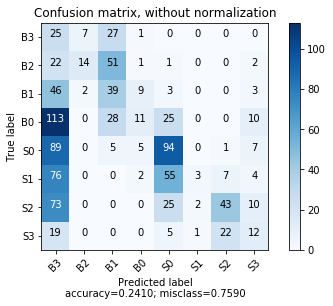

In [83]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3997/3997 [==============================] - 1s 349us/step - loss: 1.9218 - accuracy: 0.2229
Epoch 2/300
3997/3997 [==============================] - 1s 171us/step - loss: 1.4925 - accuracy: 0.3853
Epoch 3/300
3997/3997 [==============================] - 1s 173us/step - loss: 1.4135 - accuracy: 0.4126
Epoch 4/300
3997/3997 [==============================] - 1s 171us/step - loss: 1.3764 - accuracy: 0.4306
Epoch 5/300
3997/3997 [==============================] - 1s 171us/step - loss: 1.3496 - accuracy: 0.4483
Epoch 6/300
3997/3997 [==============================] - 1s 170us/step - loss: 1.3456 - accuracy: 0.4421
Epoch 7/300
3997/3997 [==============================] - 1s 176us/step - loss: 1.3320 - accuracy: 0.4491
Epoch 8/300
3997/3997 [==============================] - 1s 188us/step - loss: 1.3208 - accuracy: 0.4566
Epoch 9/300
3997/3997 [==============================] - 1s 193us/step - loss: 1.3166 - accuracy: 0.4656
Epoch 10/300
3997/3997 [==============================]

3997/3997 [==============================] - 1s 201us/step - loss: 1.0072 - accuracy: 0.5979
Epoch 79/300
3997/3997 [==============================] - 1s 201us/step - loss: 1.0000 - accuracy: 0.5982
Epoch 80/300
3997/3997 [==============================] - 1s 199us/step - loss: 0.9943 - accuracy: 0.6010
Epoch 81/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.9856 - accuracy: 0.6167
Epoch 82/300
3997/3997 [==============================] - 1s 189us/step - loss: 0.9840 - accuracy: 0.6075
Epoch 83/300
3997/3997 [==============================] - 1s 190us/step - loss: 0.9895 - accuracy: 0.5959
Epoch 84/300
3997/3997 [==============================] - 1s 196us/step - loss: 0.9778 - accuracy: 0.6160
Epoch 85/300
3997/3997 [==============================] - 1s 194us/step - loss: 0.9776 - accuracy: 0.6122
Epoch 86/300
3997/3997 [==============================] - 1s 201us/step - loss: 0.9707 - accuracy: 0.6140
Epoch 87/300
3997/3997 [==============================] - 1

3997/3997 [==============================] - 1s 199us/step - loss: 0.7361 - accuracy: 0.7108
Epoch 155/300
3997/3997 [==============================] - 1s 202us/step - loss: 0.7261 - accuracy: 0.7205
Epoch 156/300
3997/3997 [==============================] - 1s 197us/step - loss: 0.7048 - accuracy: 0.7295
Epoch 157/300
3997/3997 [==============================] - 1s 189us/step - loss: 0.7045 - accuracy: 0.7265
Epoch 158/300
3997/3997 [==============================] - 1s 188us/step - loss: 0.7096 - accuracy: 0.7260
Epoch 159/300
3997/3997 [==============================] - 1s 187us/step - loss: 0.6970 - accuracy: 0.7318
Epoch 160/300
3997/3997 [==============================] - 1s 189us/step - loss: 0.6909 - accuracy: 0.7381
Epoch 161/300
3997/3997 [==============================] - 1s 189us/step - loss: 0.7096 - accuracy: 0.7263
Epoch 162/300
3997/3997 [==============================] - 1s 192us/step - loss: 0.6811 - accuracy: 0.7416
Epoch 163/300
3997/3997 [==========================

3997/3997 [==============================] - 1s 192us/step - loss: 0.4492 - accuracy: 0.8299
Epoch 231/300
3997/3997 [==============================] - 1s 191us/step - loss: 0.4511 - accuracy: 0.8334
Epoch 232/300
3997/3997 [==============================] - 1s 190us/step - loss: 0.4409 - accuracy: 0.8361
Epoch 233/300
3997/3997 [==============================] - 1s 201us/step - loss: 0.4486 - accuracy: 0.8289
Epoch 234/300
3997/3997 [==============================] - 1s 199us/step - loss: 0.4563 - accuracy: 0.8296
Epoch 235/300
3997/3997 [==============================] - 1s 197us/step - loss: 0.4658 - accuracy: 0.8341
Epoch 236/300
3997/3997 [==============================] - 1s 194us/step - loss: 0.4630 - accuracy: 0.8246
Epoch 237/300
3997/3997 [==============================] - 1s 200us/step - loss: 0.4295 - accuracy: 0.8414
Epoch 238/300
3997/3997 [==============================] - 1s 193us/step - loss: 0.4181 - accuracy: 0.8504
Epoch 239/300
3997/3997 [==========================

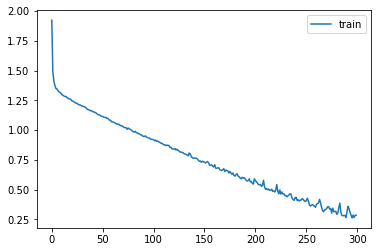

In [84]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 5
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.72222   0.21667   0.33333        60
          B2    0.33333   0.35165   0.34225        91
          B1    0.25926   0.06863   0.10853       102
          B0    0.30714   0.22995   0.26300       187
          S0    0.32632   0.30846   0.31714       201
          S1    0.44828   0.08844   0.14773       147
          S2    0.26431   0.63399   0.37308       153
          S3    0.44000   0.37288   0.40367        59

   micro avg    0.31516   0.28900   0.30151      1000
   macro avg    0.38761   0.28383   0.28609      1000
weighted avg    0.35543   0.28900   0.27775      1000
 samples avg    0.28900   0.28900   0.28900      1000

Confusion matrix, without normalization
[[16 20  0 19  3  0  2  0]
 [13 32  7 27  4  0  8  0]
 [ 8 28  7 22 12  1 24  0]
 [26 15 10 43 42  5 46  0]
 [20  0  3 24 62  7 83  2]
 [10  1  0  4 35 13 77  7]
 [ 6  0  0  1 27  3 9

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


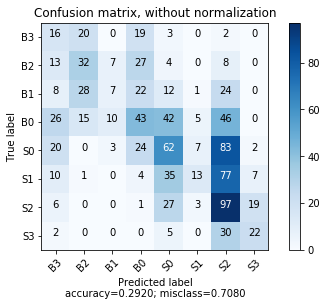

In [85]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 2s 473us/step - loss: 1.9719 - accuracy: 0.2001
Epoch 2/300
3993/3993 [==============================] - 1s 288us/step - loss: 1.5476 - accuracy: 0.3586
Epoch 3/300
3993/3993 [==============================] - 1s 279us/step - loss: 1.4369 - accuracy: 0.4002
Epoch 4/300
3993/3993 [==============================] - 1s 287us/step - loss: 1.3991 - accuracy: 0.4280
Epoch 5/300
3993/3993 [==============================] - 1s 315us/step - loss: 1.3859 - accuracy: 0.4270
Epoch 6/300
3993/3993 [==============================] - 1s 319us/step - loss: 1.3659 - accuracy: 0.4373
Epoch 7/300
3993/3993 [==============================] - 1s 338us/step - loss: 1.3560 - accuracy: 0.4438
Epoch 8/300
3993/3993 [==============================] - 1s 336us/step - loss: 1.3431 - accuracy: 0.4463
Epoch 9/300
3993/3993 [==============================] - 1s 333us/step - loss: 1.3327 - accuracy: 0.4470
Epoch 10/300
3993/3993 [==============================]

3993/3993 [==============================] - 1s 323us/step - loss: 0.9426 - accuracy: 0.6304
Epoch 79/300
3993/3993 [==============================] - 1s 327us/step - loss: 0.9540 - accuracy: 0.6253
Epoch 80/300
3993/3993 [==============================] - 1s 315us/step - loss: 0.9537 - accuracy: 0.6211
Epoch 81/300
3993/3993 [==============================] - 1s 319us/step - loss: 0.9567 - accuracy: 0.6208
Epoch 82/300
3993/3993 [==============================] - 1s 317us/step - loss: 0.9735 - accuracy: 0.6178
Epoch 83/300
3993/3993 [==============================] - 1s 317us/step - loss: 0.9379 - accuracy: 0.6391
Epoch 84/300
3993/3993 [==============================] - 1s 311us/step - loss: 0.9224 - accuracy: 0.6371
Epoch 85/300
3993/3993 [==============================] - 1s 325us/step - loss: 0.9139 - accuracy: 0.6436
Epoch 86/300
3993/3993 [==============================] - 1s 321us/step - loss: 0.9131 - accuracy: 0.6419
Epoch 87/300
3993/3993 [==============================] - 1

3993/3993 [==============================] - 1s 315us/step - loss: 0.6549 - accuracy: 0.7413
Epoch 155/300
3993/3993 [==============================] - 1s 312us/step - loss: 0.6768 - accuracy: 0.7410
Epoch 156/300
3993/3993 [==============================] - 1s 316us/step - loss: 0.7347 - accuracy: 0.7060
Epoch 157/300
3993/3993 [==============================] - 1s 328us/step - loss: 0.7196 - accuracy: 0.7193
Epoch 158/300
3993/3993 [==============================] - 1s 319us/step - loss: 0.6811 - accuracy: 0.7353
Epoch 159/300
3993/3993 [==============================] - 1s 314us/step - loss: 0.6559 - accuracy: 0.7461
Epoch 160/300
3993/3993 [==============================] - 1s 313us/step - loss: 0.6356 - accuracy: 0.7533
Epoch 161/300
3993/3993 [==============================] - 1s 312us/step - loss: 0.6326 - accuracy: 0.7538
Epoch 162/300
3993/3993 [==============================] - 1s 310us/step - loss: 0.6469 - accuracy: 0.7478
Epoch 163/300
3993/3993 [==========================

3993/3993 [==============================] - 1s 311us/step - loss: 0.4765 - accuracy: 0.8199
Epoch 231/300
3993/3993 [==============================] - 1s 316us/step - loss: 0.4488 - accuracy: 0.8292
Epoch 232/300
3993/3993 [==============================] - 1s 308us/step - loss: 0.4753 - accuracy: 0.8222
Epoch 233/300
3993/3993 [==============================] - 1s 312us/step - loss: 0.6067 - accuracy: 0.7719
Epoch 234/300
3993/3993 [==============================] - 1s 313us/step - loss: 0.5689 - accuracy: 0.7869
Epoch 235/300
3993/3993 [==============================] - 1s 313us/step - loss: 0.4553 - accuracy: 0.8310
Epoch 236/300
3993/3993 [==============================] - 1s 315us/step - loss: 0.4280 - accuracy: 0.8452
Epoch 237/300
3993/3993 [==============================] - 1s 312us/step - loss: 0.4262 - accuracy: 0.8375
Epoch 238/300
3993/3993 [==============================] - 1s 315us/step - loss: 0.4121 - accuracy: 0.8505
Epoch 239/300
3993/3993 [==========================

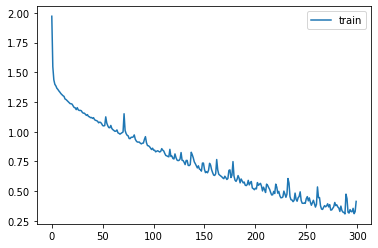

In [86]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 10
Number of indicators 3
              precision    recall  f1-score   support

          B3    0.75000   0.15000   0.25000        60
          B2    0.39344   0.26667   0.31788        90
          B1    0.36250   0.28431   0.31868       102
          B0    0.31801   0.44385   0.37054       187
          S0    0.32353   0.21891   0.26113       201
          S1    0.29762   0.17007   0.21645       147
          S2    0.35135   0.33987   0.34551       153
          S3    0.30000   0.30508   0.30252        59

   micro avg    0.33729   0.28428   0.30853       999
   macro avg    0.38706   0.27234   0.29784       999
weighted avg    0.35745   0.28428   0.30072       999
 samples avg    0.28428   0.28428   0.28428       999

Confusion matrix, without normalization
[[13 21  7 13  5  0  1  0]
 [10 24 20 29  6  0  1  0]
 [ 6 13 29 39 12  0  2  1]
 [35  3 19 83 30  4 11  2]
 [37  0  5 59 44 28 23  5]
 [34  0  0 25 24 25 31  8]
 [31  0  0 11 13 20 

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


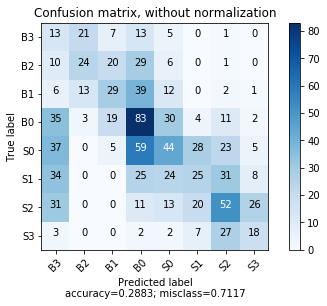

In [87]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)

Epoch 1/300
3993/3993 [==============================] - 2s 531us/step - loss: 1.9134 - accuracy: 0.2297
Epoch 2/300
3993/3993 [==============================] - 1s 355us/step - loss: 1.4756 - accuracy: 0.3904
Epoch 3/300
3993/3993 [==============================] - 2s 398us/step - loss: 1.4005 - accuracy: 0.4192
Epoch 4/300
3993/3993 [==============================] - 2s 443us/step - loss: 1.3730 - accuracy: 0.4320
Epoch 5/300
3993/3993 [==============================] - 2s 447us/step - loss: 1.3522 - accuracy: 0.4378
Epoch 6/300
3993/3993 [==============================] - 2s 443us/step - loss: 1.3395 - accuracy: 0.4558
Epoch 7/300
3993/3993 [==============================] - 2s 447us/step - loss: 1.3245 - accuracy: 0.4621
Epoch 8/300
3993/3993 [==============================] - 2s 428us/step - loss: 1.3066 - accuracy: 0.4666
Epoch 9/300
3993/3993 [==============================] - 2s 439us/step - loss: 1.2964 - accuracy: 0.4576
Epoch 10/300
3993/3993 [==============================]

3993/3993 [==============================] - 2s 455us/step - loss: 0.7237 - accuracy: 0.7135
Epoch 79/300
3993/3993 [==============================] - 2s 449us/step - loss: 0.7267 - accuracy: 0.7132
Epoch 80/300
3993/3993 [==============================] - 2s 456us/step - loss: 0.6999 - accuracy: 0.7263
Epoch 81/300
3993/3993 [==============================] - 2s 450us/step - loss: 0.6971 - accuracy: 0.7313
Epoch 82/300
3993/3993 [==============================] - 2s 440us/step - loss: 0.6888 - accuracy: 0.7378
Epoch 83/300
3993/3993 [==============================] - 2s 449us/step - loss: 0.7111 - accuracy: 0.7265
Epoch 84/300
3993/3993 [==============================] - 2s 454us/step - loss: 0.6994 - accuracy: 0.7370
Epoch 85/300
3993/3993 [==============================] - 2s 450us/step - loss: 0.6518 - accuracy: 0.7471
Epoch 86/300
3993/3993 [==============================] - 2s 456us/step - loss: 0.6564 - accuracy: 0.7478
Epoch 87/300
3993/3993 [==============================] - 2

3993/3993 [==============================] - 2s 450us/step - loss: 0.2661 - accuracy: 0.9154
Epoch 155/300
3993/3993 [==============================] - 2s 455us/step - loss: 0.2458 - accuracy: 0.9161
Epoch 156/300
3993/3993 [==============================] - 2s 445us/step - loss: 0.2357 - accuracy: 0.9219
Epoch 157/300
3993/3993 [==============================] - 2s 454us/step - loss: 0.2337 - accuracy: 0.9266
Epoch 158/300
3993/3993 [==============================] - 2s 447us/step - loss: 0.2254 - accuracy: 0.9271
Epoch 159/300
3993/3993 [==============================] - 2s 456us/step - loss: 0.2157 - accuracy: 0.9351
Epoch 160/300
3993/3993 [==============================] - 2s 438us/step - loss: 0.2402 - accuracy: 0.9174
Epoch 161/300
3993/3993 [==============================] - 2s 448us/step - loss: 0.3159 - accuracy: 0.8958
Epoch 162/300
3993/3993 [==============================] - 2s 462us/step - loss: 0.3523 - accuracy: 0.8815
Epoch 163/300
3993/3993 [==========================

3993/3993 [==============================] - 2s 452us/step - loss: 0.0350 - accuracy: 0.9930
Epoch 231/300
3993/3993 [==============================] - 2s 450us/step - loss: 0.1029 - accuracy: 0.9694
Epoch 232/300
3993/3993 [==============================] - 2s 449us/step - loss: 0.2184 - accuracy: 0.9246
Epoch 233/300
3993/3993 [==============================] - 2s 448us/step - loss: 0.1866 - accuracy: 0.9386
Epoch 234/300
3993/3993 [==============================] - 2s 447us/step - loss: 0.1987 - accuracy: 0.9364
Epoch 235/300
3993/3993 [==============================] - 2s 450us/step - loss: 0.0912 - accuracy: 0.9732
Epoch 236/300
3993/3993 [==============================] - 2s 448us/step - loss: 0.0601 - accuracy: 0.9860
Epoch 237/300
3993/3993 [==============================] - 2s 446us/step - loss: 0.0374 - accuracy: 0.9935
Epoch 238/300
3993/3993 [==============================] - 2s 462us/step - loss: 0.0247 - accuracy: 0.9975
Epoch 239/300
3993/3993 [==========================

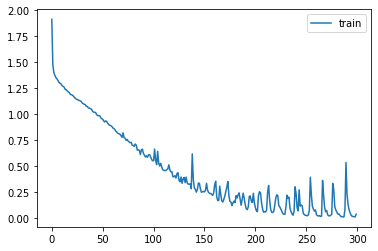

In [88]:
fit(m, c, s, i)

Model lstm
Number of classes 8
Number of steps 10
Number of indicators 6
              precision    recall  f1-score   support

          B3    0.38095   0.13333   0.19753        60
          B2    0.27027   0.11111   0.15748        90
          B1    0.19318   0.16667   0.17895       102
          B0    0.23333   0.48663   0.31542       187
          S0    0.38509   0.30846   0.34254       201
          S1    0.17949   0.04762   0.07527       147
          S2    0.34286   0.31373   0.32765       153
          S3    0.24324   0.45763   0.31765        59

   micro avg    0.27356   0.27027   0.27190       999
   macro avg    0.27855   0.25315   0.23906       999
weighted avg    0.28140   0.27027   0.25230       999
 samples avg    0.27027   0.27027   0.27027       999

Confusion matrix, without normalization
[[ 9 10 17 18  3  0  2  1]
 [ 8 10 24 39  5  0  4  0]
 [ 5 11 17 53 11  2  2  1]
 [ 5  5 16 91 46 11  7  6]
 [ 0  1  6 93 62 14 17  8]
 [ 3  0  4 53 17  7 41 22]
 [ 2  0  4 33 15  5 

/Users/kisdev/anaconda3/envs/mc030/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


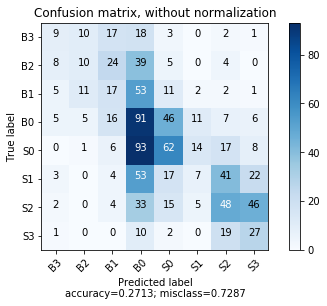

In [89]:
predict(m, c, s, i)
m, c, s, i = get_next_value(m, c, s, i)